## **Exploratory Data Analysis**

#### Interpretation of Results and Decision made are put in between images after each code blocks, be careful missing out some of the analysis. Please read REAMDE.md for combined key findings and decisions

### **Import the dependencies**

In [171]:
import warnings
warnings.filterwarnings('ignore')
import os
import gc
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from langdetect import detect
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\e0817820\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [172]:
IMAGE_DIR = os.path.join(os.getcwd(), 'images')
DATA_DIR = os.path.join(os.getcwd(), 'data')

In [173]:
def create_if_missing_folder(path: str):
    if not os.path.exists(path):
        os.makedirs(path)
create_if_missing_folder(IMAGE_DIR)
create_if_missing_folder(DATA_DIR)
DATA_PATH = os.path.join(DATA_DIR, 'pets_prepared.csv')

### **Read the data and show the overall information**

In [174]:
df = pd.read_csv(DATA_PATH)
df.head(n=10)

,PetID,AdoptionSpeed,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,...,HealthName,VaccinatedName,DewormedName,SterilizedName,BreedName,BreedBinsName,StateName,StateBinsName,ColorName,AdoptedName
0,86e1089a3,2,2,Nibble,3,299,0,1,1,7,...,Healthy,No,No,No,Tabby,Tabby,Selangor,Selangor,Black,Y
1,6296e909a,0,2,No Name Yet,1,265,0,1,1,2,...,Healthy,Not Sure,Not Sure,Not Sure,Domestic Medium Hair,Domestic Medium Hair,Kuala Lumpur,Kuala Lumpur,Black,Y
2,3422e4906,3,1,Brisco,1,307,0,1,2,7,...,Healthy,Yes,Yes,No,Mixed Breed,Mixed Breed,Selangor,Selangor,Brown,Y
3,5842f1ff5,2,1,Miko,4,307,0,2,1,2,...,Healthy,Yes,Yes,No,Mixed Breed,Mixed Breed,Kuala Lumpur,Kuala Lumpur,Black,Y
4,850a43f90,2,1,Hunter,1,307,0,1,1,0,...,Healthy,No,No,No,Mixed Breed,Mixed Breed,Selangor,Selangor,Black,Y
5,d24c30b4b,2,2,No Name,3,266,0,2,5,6,...,Healthy,No,No,No,Domestic Short Hair,Domestic Short Hair,Selangor,Selangor,Cream,Y
6,1caa6fcdb,1,2,BULAT,12,264,264,1,1,0,...,Healthy,No,No,Not Sure,Domestic Long Hair,Domestic Long Hair,Selangor,Selangor,Black,Y
7,97aa9eeac,3,1,Siu Pak & Her 6 Puppies,0,307,0,2,1,2,...,Healthy,No,No,No,Mixed Breed,Mixed Breed,Selangor,Selangor,Black,Y
8,c06d167ca,1,2,No Name,2,265,0,2,6,0,...,Healthy,No,No,No,Domestic Medium Hair,Domestic Medium Hair,Selangor,Selangor,Gray,Y
9,7a0942d61,4,2,Kitty,12,265,0,2,1,7,...,Healthy,Not Sure,Not Sure,Not Sure,Domestic Medium Hair,Domestic Medium Hair,Selangor,Selangor,Black,N


In [175]:
df.shape

(14993, 49)

In [176]:
df.isna().sum()

PetID                0
AdoptionSpeed        0
Type                 0
Name                 8
Age                  0
Breed1               0
Breed2               0
Gender               0
Color1               0
Color2               0
Color3               0
MaturitySize         0
FurLength            0
Vaccinated           0
Dewormed             0
Sterilized           0
Health               0
Quantity             0
Fee                  0
State                0
RescuerID            0
VideoAmt             0
PhotoAmt             0
Description         13
AgeBins              0
FeeBins              0
BreedBins            0
StateBins            0
VideoAmtBins         0
PhotoAmtBins         0
QuantityBins         0
BreedPure            0
ColorAmt             0
NameorNO             0
Adopted              0
TypeName             0
GenderName           0
MaturitySizeName     0
FurLengthName        0
HealthName           0
VaccinatedName       0
DewormedName         0
SterilizedName       0
BreedName  

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PetID             14993 non-null  object
 1   AdoptionSpeed     14993 non-null  int64 
 2   Type              14993 non-null  int64 
 3   Name              14985 non-null  object
 4   Age               14993 non-null  int64 
 5   Breed1            14993 non-null  int64 
 6   Breed2            14993 non-null  int64 
 7   Gender            14993 non-null  int64 
 8   Color1            14993 non-null  int64 
 9   Color2            14993 non-null  int64 
 10  Color3            14993 non-null  int64 
 11  MaturitySize      14993 non-null  int64 
 12  FurLength         14993 non-null  int64 
 13  Vaccinated        14993 non-null  int64 
 14  Dewormed          14993 non-null  int64 
 15  Sterilized        14993 non-null  int64 
 16  Health            14993 non-null  int64 
 17  Quantity    

In [178]:
df.columns

Index(['PetID', 'AdoptionSpeed', 'Type', 'Name', 'Age', 'Breed1', 'Breed2',
       'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength',
       'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee',
       'State', 'RescuerID', 'VideoAmt', 'PhotoAmt', 'Description', 'AgeBins',
       'FeeBins', 'BreedBins', 'StateBins', 'VideoAmtBins', 'PhotoAmtBins',
       'QuantityBins', 'BreedPure', 'ColorAmt', 'NameorNO', 'Adopted',
       'TypeName', 'GenderName', 'MaturitySizeName', 'FurLengthName',
       'HealthName', 'VaccinatedName', 'DewormedName', 'SterilizedName',
       'BreedName', 'BreedBinsName', 'StateName', 'StateBinsName', 'ColorName',
       'AdoptedName'],
      dtype='object')

After refering to the Data_Dictionary_Pets.pdf, I figured out that there are some duplicates features (one can be derived from other column). Therefore, I remove thoes duplicates columns and use "...Name" columns for easier visualisation and understanding as they use the real name instead of encoded number. Moreover, I also drop those entries with NaN values, since the number of them are neglectable.

In [179]:
TARGET = 'AdoptionSpeed'
duplicates_col = ['Name', 'Adopted', 'Type', 'Gender', 'MaturitySize', 'FurLength', 'Health', 'Vaccinated', 'Dewormed', 'Sterilized', 'Color1', 'Color2', 'Color3', 'Breed1', 'Breed2', 'State', 'StateBins', 'BreedBins', 'BreedBinsName', 'Fee', 'ColorAmt', 'AdoptedName', 'StateBinsName']
text_description = ['Description', 'Name', 'RescuerID', 'PetID']
numerical_features = df.select_dtypes(include=['int64']).drop([TARGET] + text_description + duplicates_col, axis=1, errors='ignore').columns
categorical_features = df.select_dtypes(include=['object']).drop([TARGET] + text_description + duplicates_col, axis=1, errors='ignore').columns 

In [180]:
print(f'List of numerical features: {numerical_features}')
print(f'List of categorical features: {categorical_features}')
print(f'There are {len(numerical_features)} Numerical variables')
print(f'There are {len(categorical_features)} Categorical variables, exclude the target variable')

List of numerical features: Index(['Age', 'Quantity', 'VideoAmt', 'PhotoAmt'], dtype='object')
List of categorical features: Index(['AgeBins', 'FeeBins', 'VideoAmtBins', 'PhotoAmtBins', 'QuantityBins',
       'BreedPure', 'NameorNO', 'TypeName', 'GenderName', 'MaturitySizeName',
       'FurLengthName', 'HealthName', 'VaccinatedName', 'DewormedName',
       'SterilizedName', 'BreedName', 'StateName', 'ColorName'],
      dtype='object')
There are 4 Numerical variables
There are 18 Categorical variables, exclude the target variable


In [181]:
df.dropna(inplace=True)

In [182]:
df.describe(include=object)

,PetID,Name,RescuerID,Description,AgeBins,FeeBins,BreedBins,StateBins,VideoAmtBins,PhotoAmtBins,...,HealthName,VaccinatedName,DewormedName,SterilizedName,BreedName,BreedBinsName,StateName,StateBinsName,ColorName,AdoptedName
count,14968,14968,14968,14968,14968,14968,14968,14968,14968,14968,...,14968,14968,14968,14968,14968,14968,14968,14968,14968,14968
unique,14968,9048,5580,13993,7,4,7,7,3,7,...,3,3,3,3,175,7,14,7,7,2
top,86e1089a3,No Name,fa90fa5b1ee11c86938398b60abc32cb,For Adoption,"[ 3, 6)",0,307,41326,0,1,...,Healthy,No,Yes,No,Mixed Breed,Mixed Breed,Selangor,Selangor,Black,Y
freq,1,1309,459,164,3666,12642,5921,8700,14394,3070,...,14455,7213,8385,10063,5921,5921,8700,8700,7412,10780


### **Explore and visualize data**

#### Define some visualize functions


In [183]:
def eda_target_variable(data, color='Set2'): 
    """Visualize the target variable distribution

    Args:
        data (_type_): dataframe
        color (str, optional): Color set of the diagram. Defaults to 'Set2'.
    """
    fig,ax = plt.subplots(figsize=(16,12))
    palette_color = sns.color_palette(color)
    ax = sns.countplot(x=TARGET, data=data, palette=color, order=data[TARGET].value_counts().index)
    ax.set_ylabel('Count')
    patches = ax.patches
    for j in range(len(patches)):
        percentage = list(data[TARGET].value_counts())[j]/data[TARGET].value_counts().sum()
        offset = data[TARGET].value_counts().max() * 0.01
        x = patches[j].get_x() + patches[j].get_width()/2
        y = patches[j].get_height() + offset
        ax.annotate('{:.1f}%'.format(percentage*100), (x, y), ha='center')
    fig = plt.gcf()
    plt.savefig(os.path.join(IMAGE_DIR, f'{TARGET}.png'))
    fig.show()

In [184]:
def eda_univariate_numerical(data, numerical_feature, color='Set2'):
    """Visualize the numberical variable distribution

    Args:
        data (_type_): dataframe
        numerical_feature (_type_): numerical feature to visualize
        color (str, optional): Color set of the diagram. Defaults to 'Set2'.
    """
    print(f'{numerical_feature}')
    fig,ax = plt.subplots(figsize = (16,12))
    palette_color = sns.color_palette(color)
    ax = sns.histplot(x = numerical_feature, 
            data=data,
            kde = True,
            color=palette_color[0],
            )
    ax.set_ylabel('Count')
    fig = plt.gcf()
    plt.show()
    fig.savefig(os.path.join(IMAGE_DIR, f'{numerical_feature}.png'))
    print('=======================================================')

In [185]:
def eda_univariate_categorical(data, categorical_feature, color='Set2'):
    """Visualize the categorical variable distribution

    Args:
        data (_type_): dataframe
        categorical_feature (_type_): categorical feature to visualize
        color (str, optional): color set of the diagram. Defaults to 'Set2'.
    """
    if data[categorical_feature].nunique() > 15:
        print(f'column {categorical_feature} has many unique values n = {data[categorical_feature].nunique()} and will not be plotted')
        print('=======================================================')
        return 
    else:
        print(f'{categorical_feature}')
        fig, ax = plt.subplots(figsize = (16,12))
        palette_color = sns.color_palette(color)
        ax = sns.countplot(x = categorical_feature, 
            data=data,
            palette=color,
            order = data[categorical_feature].value_counts().index
            )
        ax.set_ylabel('Count')

        patches = ax.patches

        for j in range(len(patches)):
            offset = data[categorical_feature].value_counts().max() * 0.01
            percentage = list(data[categorical_feature].value_counts())[j]/data[categorical_feature].value_counts().sum()
            x = patches[j].get_x() + patches[j].get_width()/2
            y = patches[j].get_height()+ offset
            ax.annotate('{:.1f}%'.format(percentage*100), (x, y), ha='center')
        fig = plt.gcf()    
        plt.show()
        fig.savefig(os.path.join(IMAGE_DIR, f'{categorical_feature}.png'))
        print('=======================================================')

In [186]:
def eda_bivariate_categorical(data, column, target, color='Set2'):
    """Visualize the relationship between a categorical variable and the target variable

    Args:
        data (_type_): dataframe
        column (_type_): categorical feature to visualize
        target (_type_): target variable
        color (str, optional): color set of the diagram. Defaults to 'Set2'.
    """
    print(f'{column} vs. {TARGET}')
    fig,ax = plt.subplots(figsize=(16,12))
    palette_color = sns.color_palette(color)
    plt.xticks(rotation=-40)
    ax = sns.countplot(x=column, data=data, hue=target, palette=color, order = data[column].value_counts().index)
    ax.set_ylabel('Count')

    offset = data[column].value_counts().max() * 0.005
    list_bars = data.groupby([column,target])[column].agg(['count']).unstack().ffill().values
    list_bars = sorted(list_bars, key=sum, reverse=True)

    patches = ax.patches
    bars_pos = 0
    for i in range(data[target].nunique()):
        for j in range(data[column].nunique()):
            list_bars_col = list_bars[j] 
            total_sum = list_bars_col.sum()
            value = list_bars_col[i]

            percentage = value / total_sum
            if percentage == 0:
                bars_pos += 1
                continue
            else:
                x = patches[bars_pos].get_x() + patches[j].get_width()/2
                y = patches[bars_pos].get_height() + offset
                ax.annotate('{:.1f}%'.format(percentage*100), (x, y), ha='center')
                bars_pos += 1
    fig = plt.gcf()
    plt.show()
    fig.savefig(os.path.join(IMAGE_DIR, f'{column}_vs_{TARGET}.png'))
    print('=======================================================')

In [187]:
def eda_bivariate_numerical(data, column, target, color='Set2'):
    """Visualize the relationship between a numerical variable and the target variable

    Args:
        data (_type_): dataframe
        column (_type_): numerical feature to visualize
        target (_type_): target variable
        color (str, optional): color set of the diagram. Defaults to 'Set2'.
    """
    print(f'{column} vs. {TARGET}')
    fig, axes = plt.subplots(1, 2, figsize=(16,12))
    cmap = sns.color_palette(color)
    for j in range(2):
        if j==0:
            sns.histplot(data = data,x=data[column],hue=target, multiple='stack',
                        bins=50,kde=True,palette=color,ax=axes[j])
            axes[j].set(xlabel=None)
            axes[j].grid(False)
        elif j==1:
            sns.boxplot(data = data,x=data[column],y = target, ax=axes[j], palette=color,orient='h')
            axes[j].set(xlabel=None)
            axes[j].grid(False)
            plt.tight_layout()
        plt.suptitle(column)
    fig = plt.gcf()
    plt.show()
    fig.savefig(os.path.join(IMAGE_DIR, f'{column}_vs_{TARGET}.png'))
    print('=======================================================')

### Target variable 

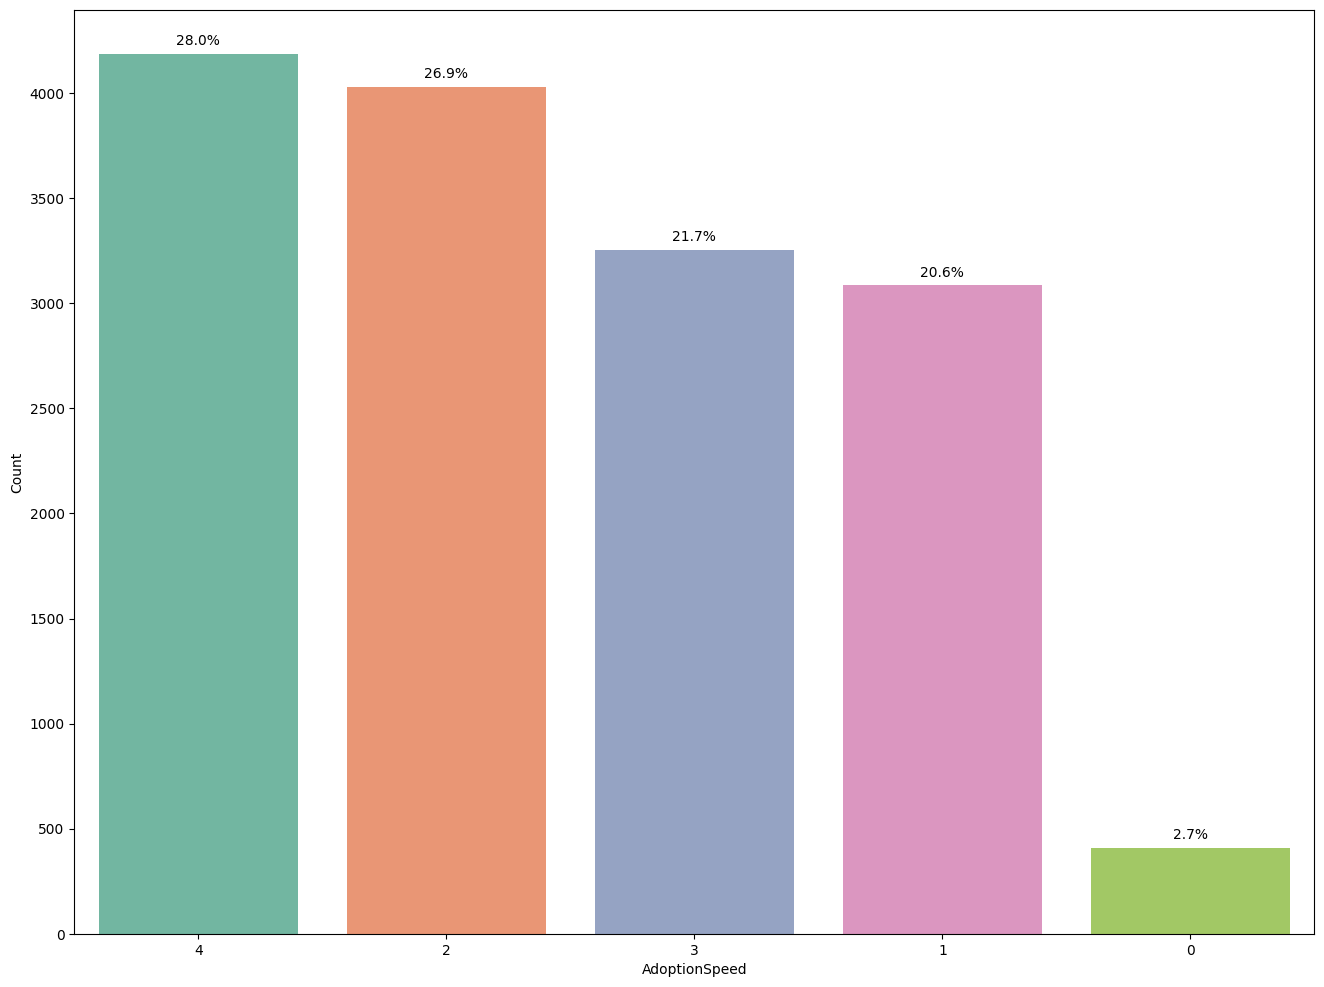

In [188]:
eda_target_variable(df)

#### **Interpretation of results**:

**AdoptionSpeed**: The number of entries in class 4 (Adopted on the same day as it was listed) is significanly lower than other 4 classes with only 2.7%. 97.3% of other animals are distributed quite evenly among 4 classes (between 1 and 7 days, between 8 and 30 days, between 31 and 90 days, and after 100 days).

We can see that the target are ordinal, meaning that it has natural order. 

#### **Decisions made**: 

I treated this problem as a regression problem, instead of a normal classification problem to capture the order of classes. I will do threshold finetune later for better prediction. 

### **Univariate analysis for categorical features**

AgeBins


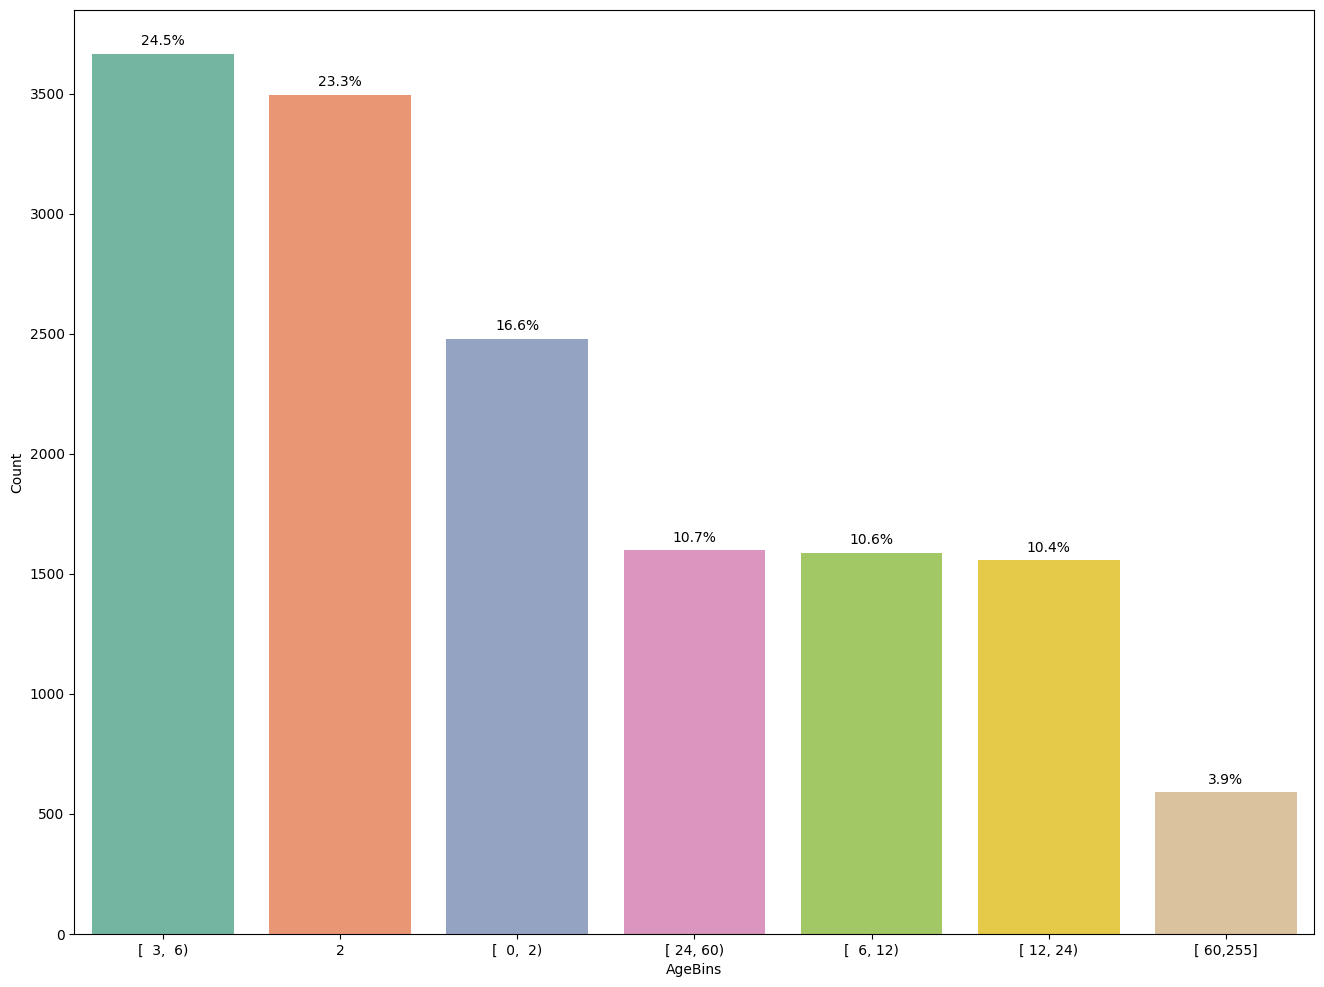

FeeBins


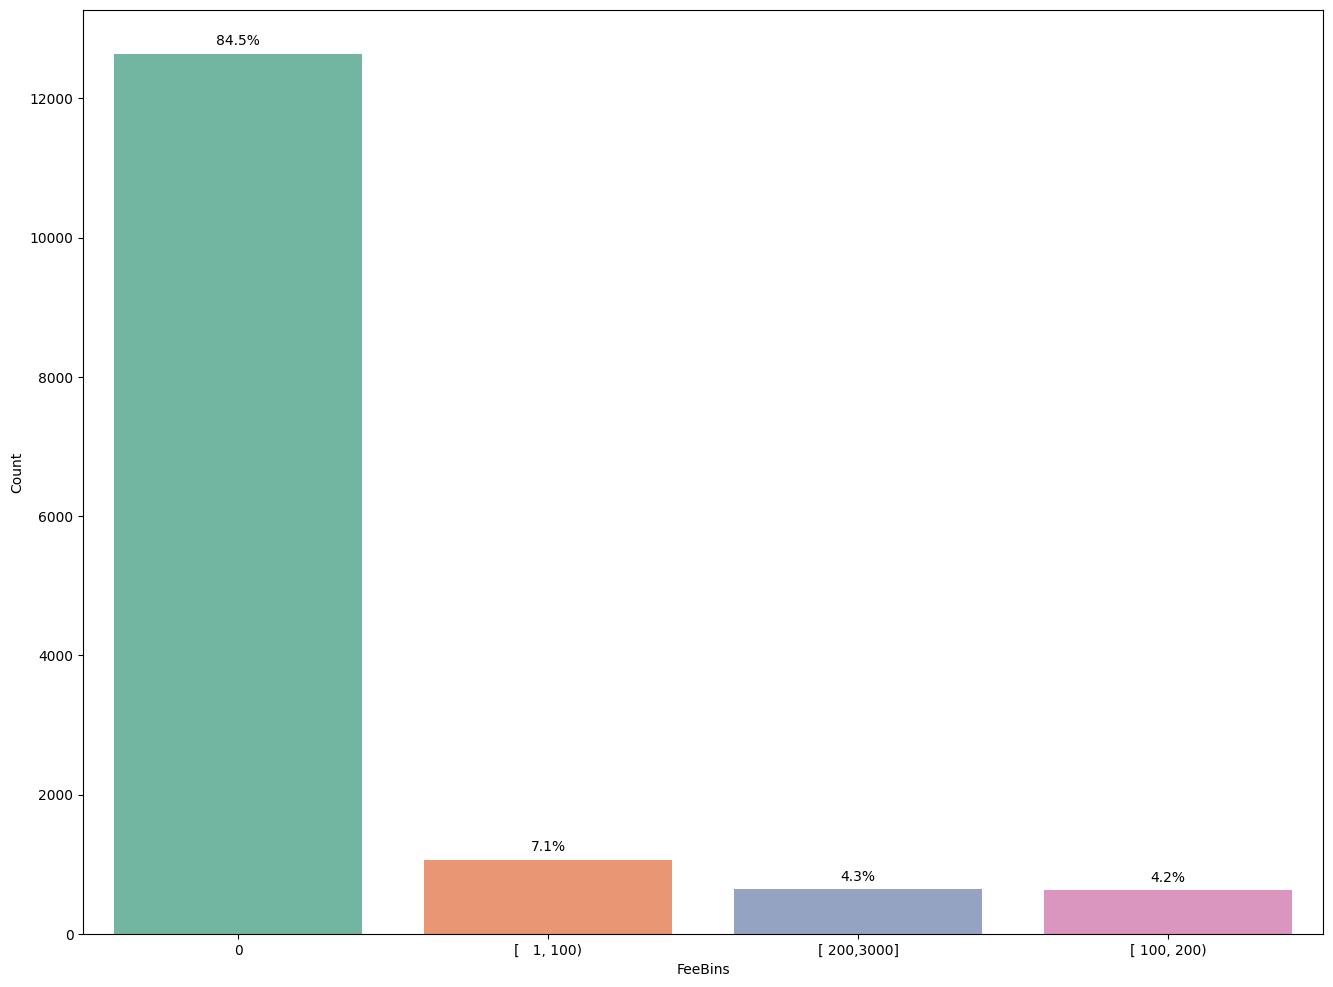

VideoAmtBins


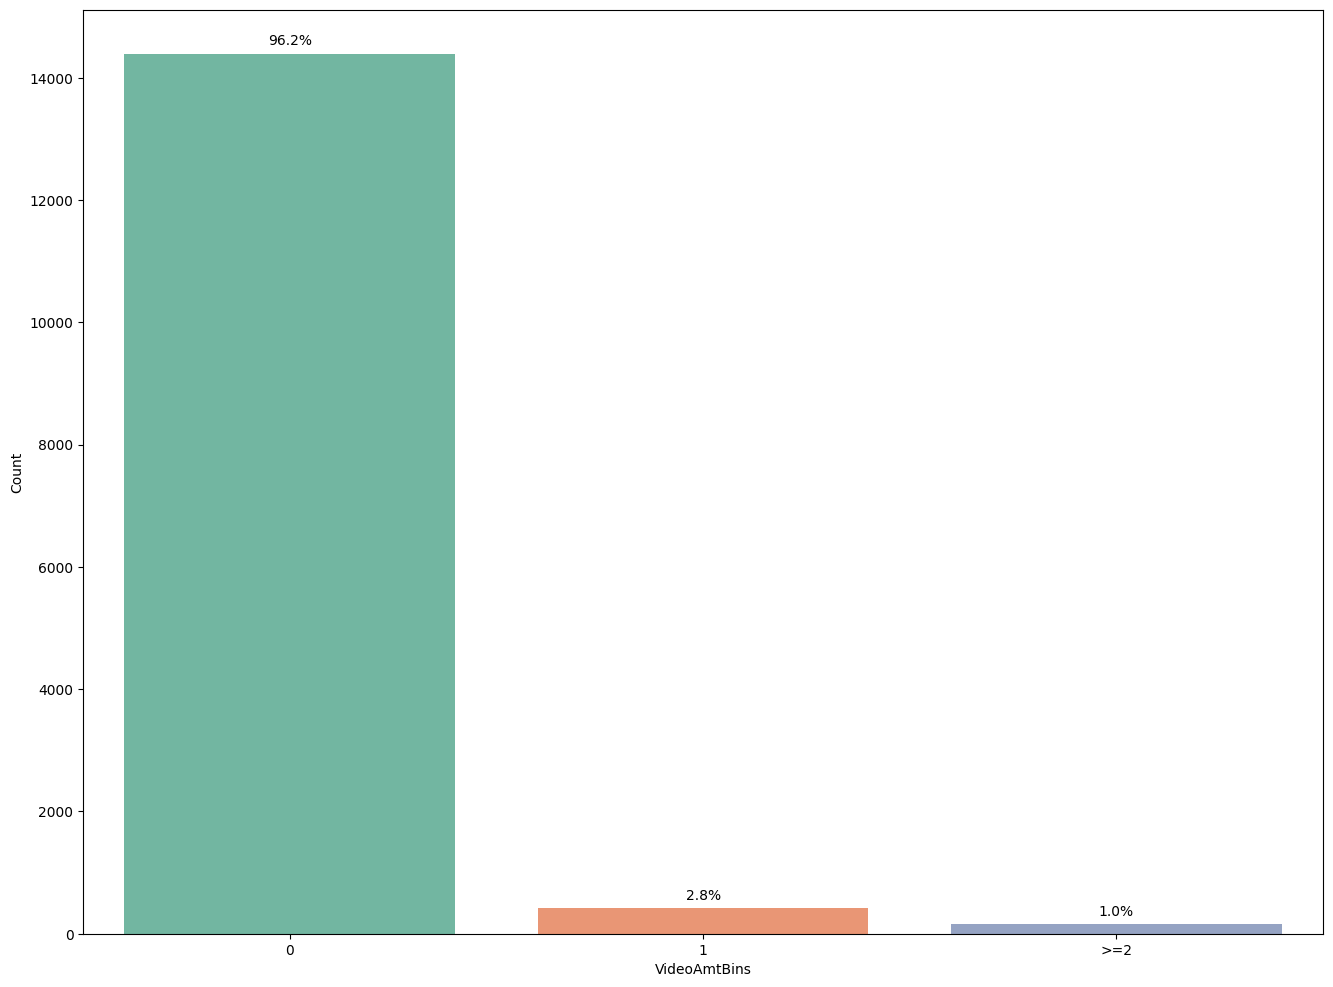

PhotoAmtBins


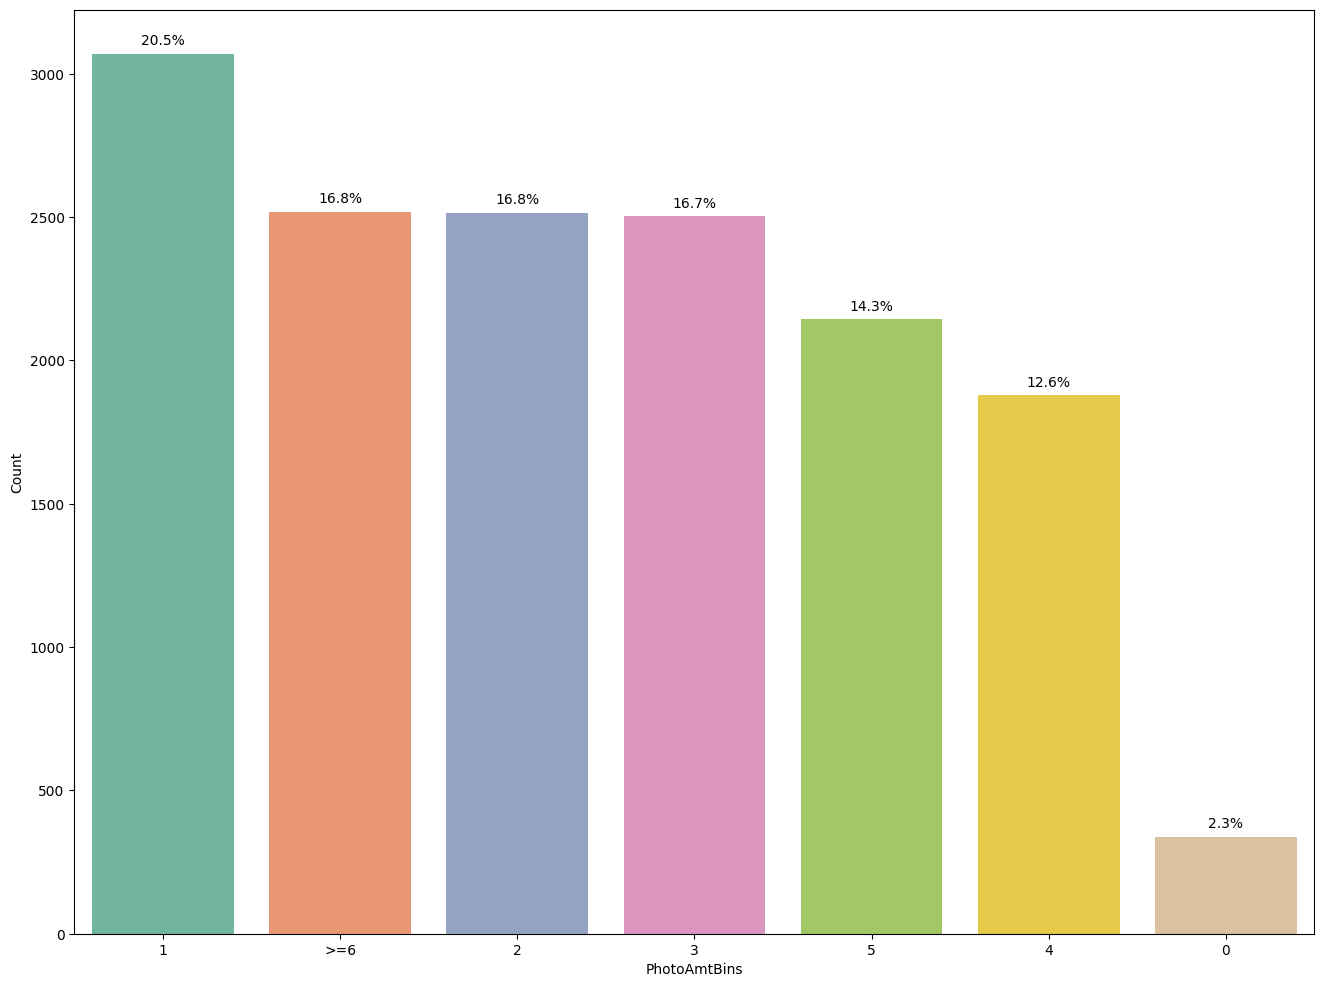

QuantityBins


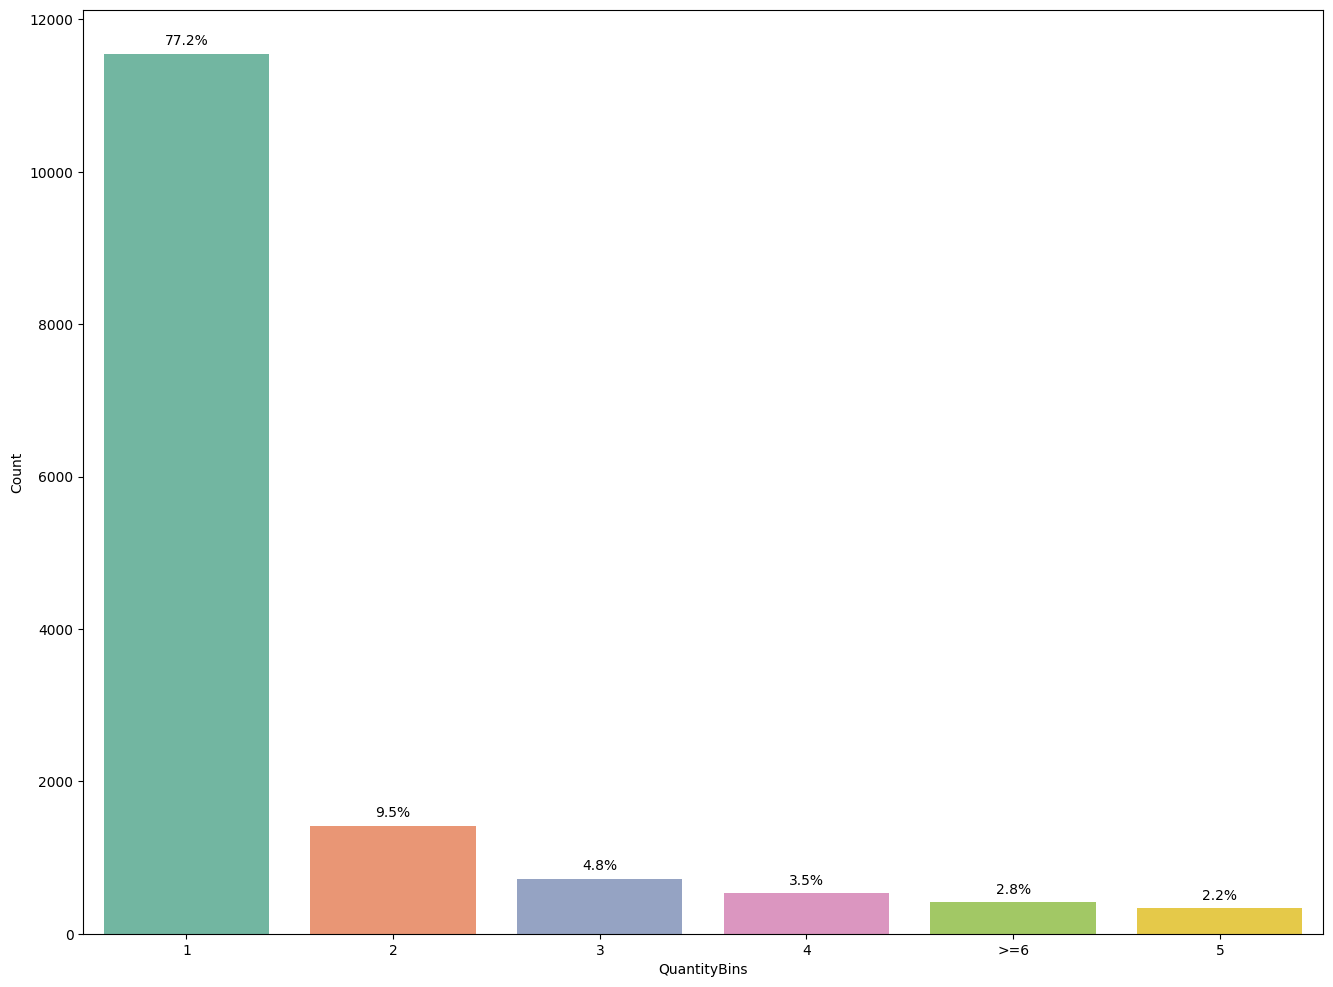

BreedPure


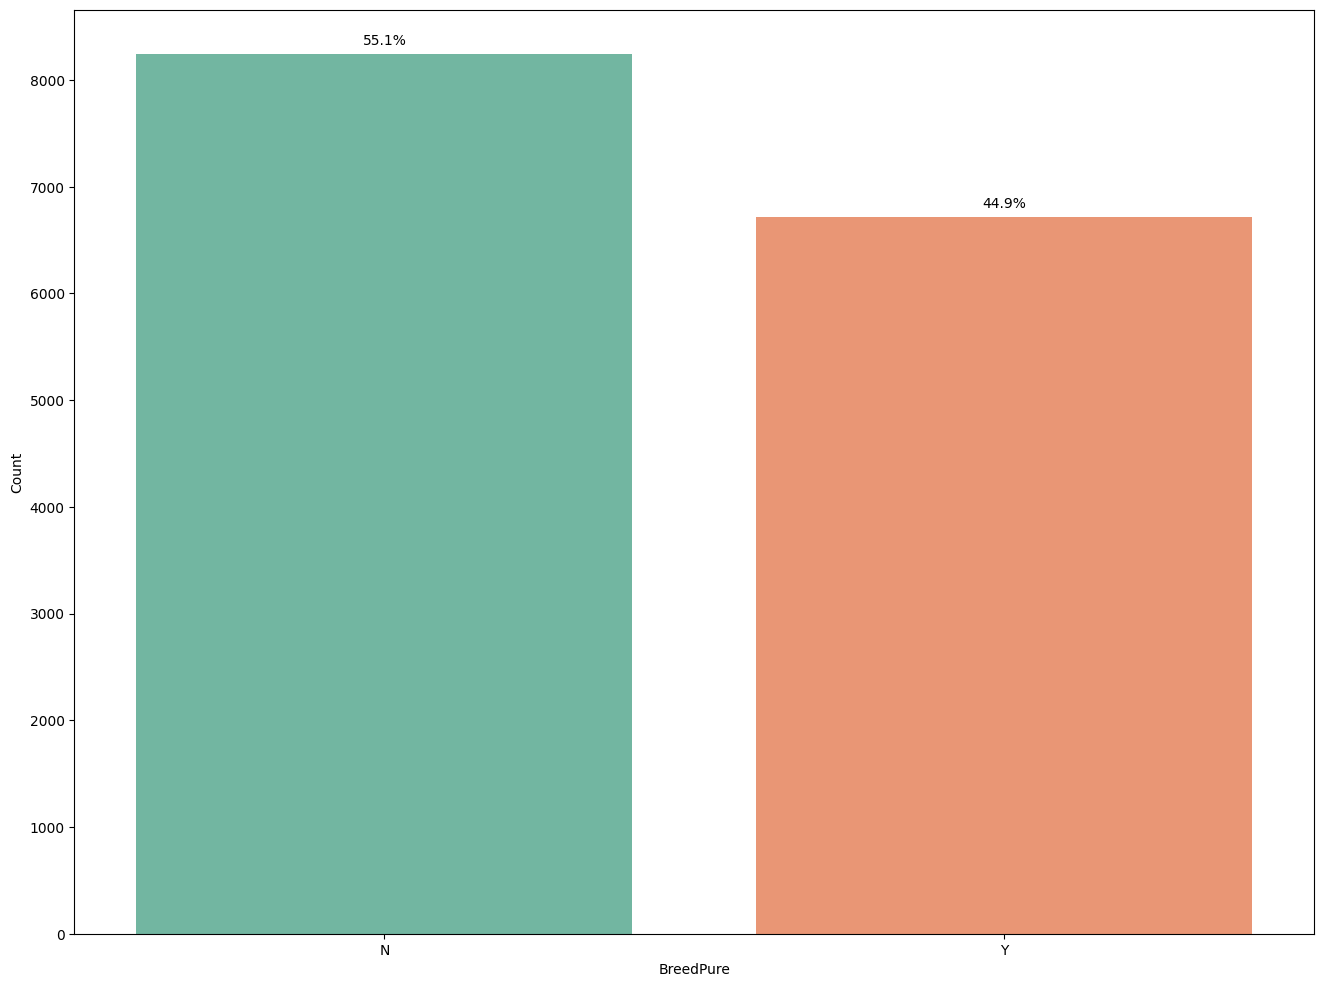

NameorNO


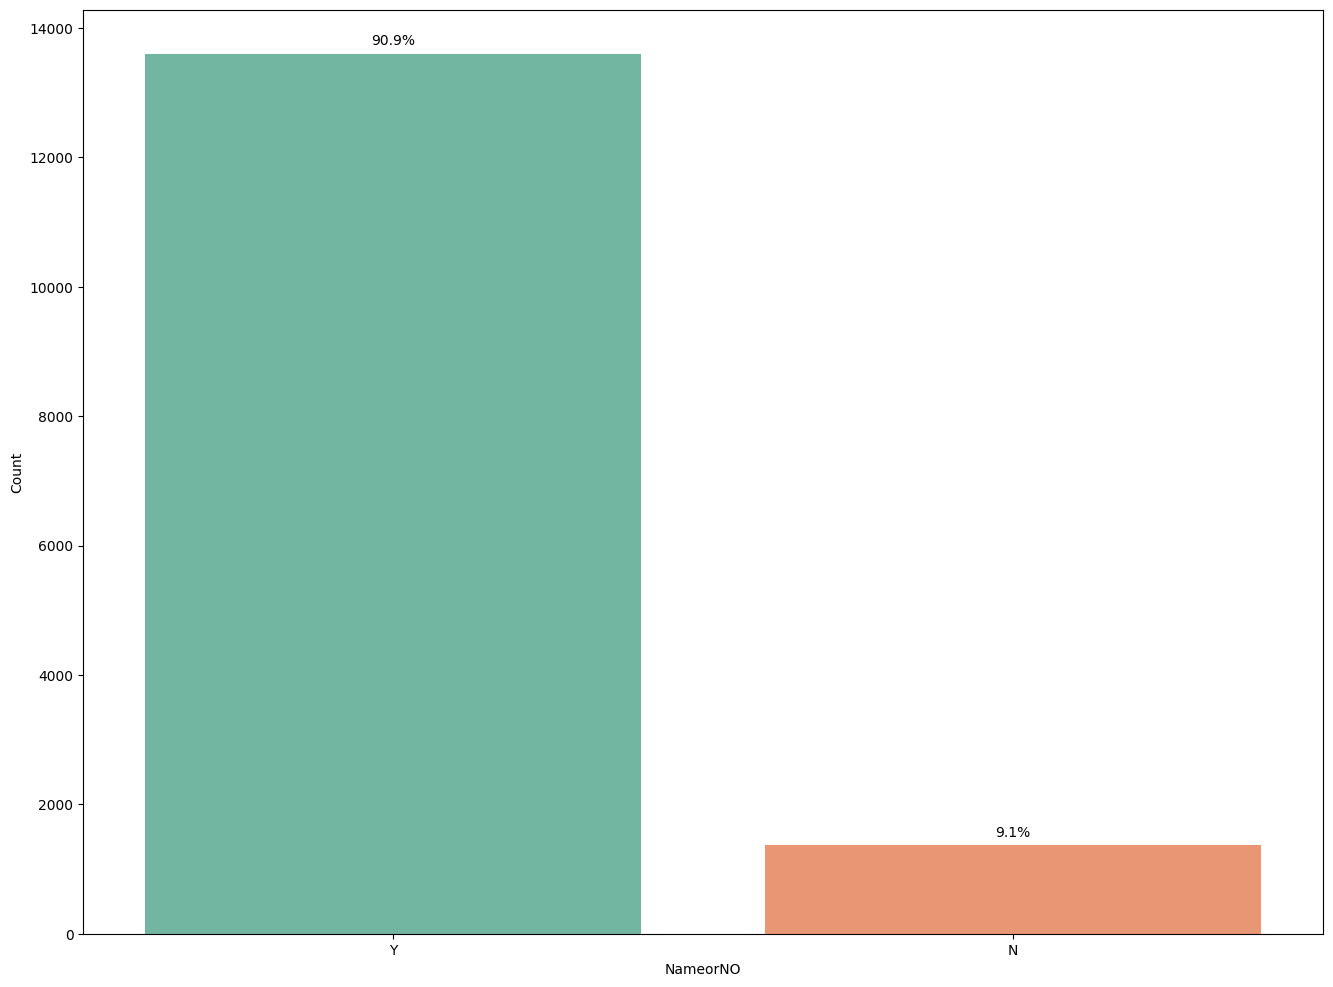

TypeName


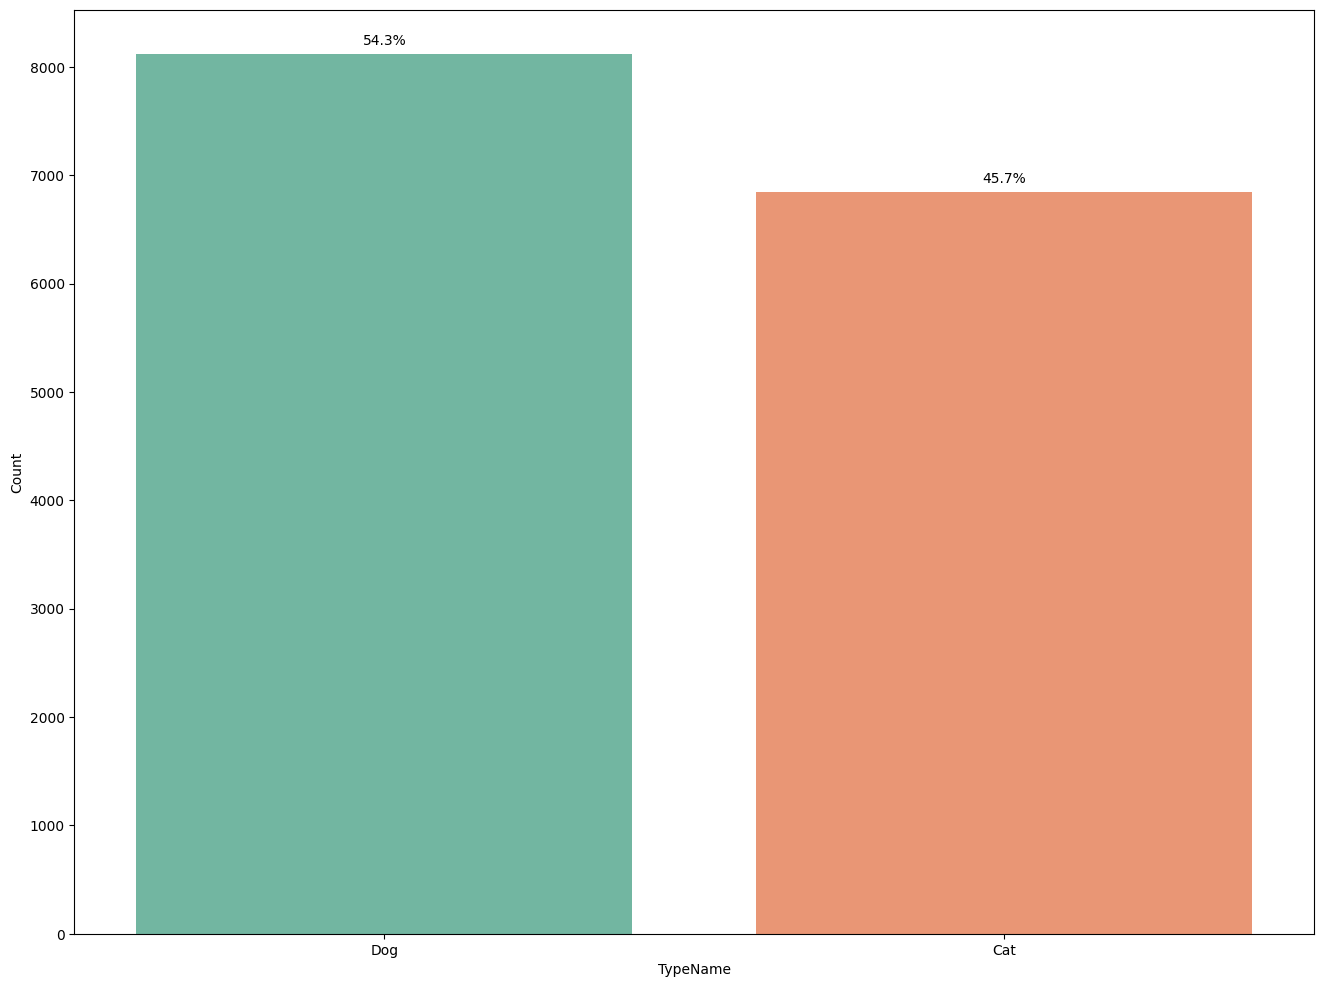

GenderName


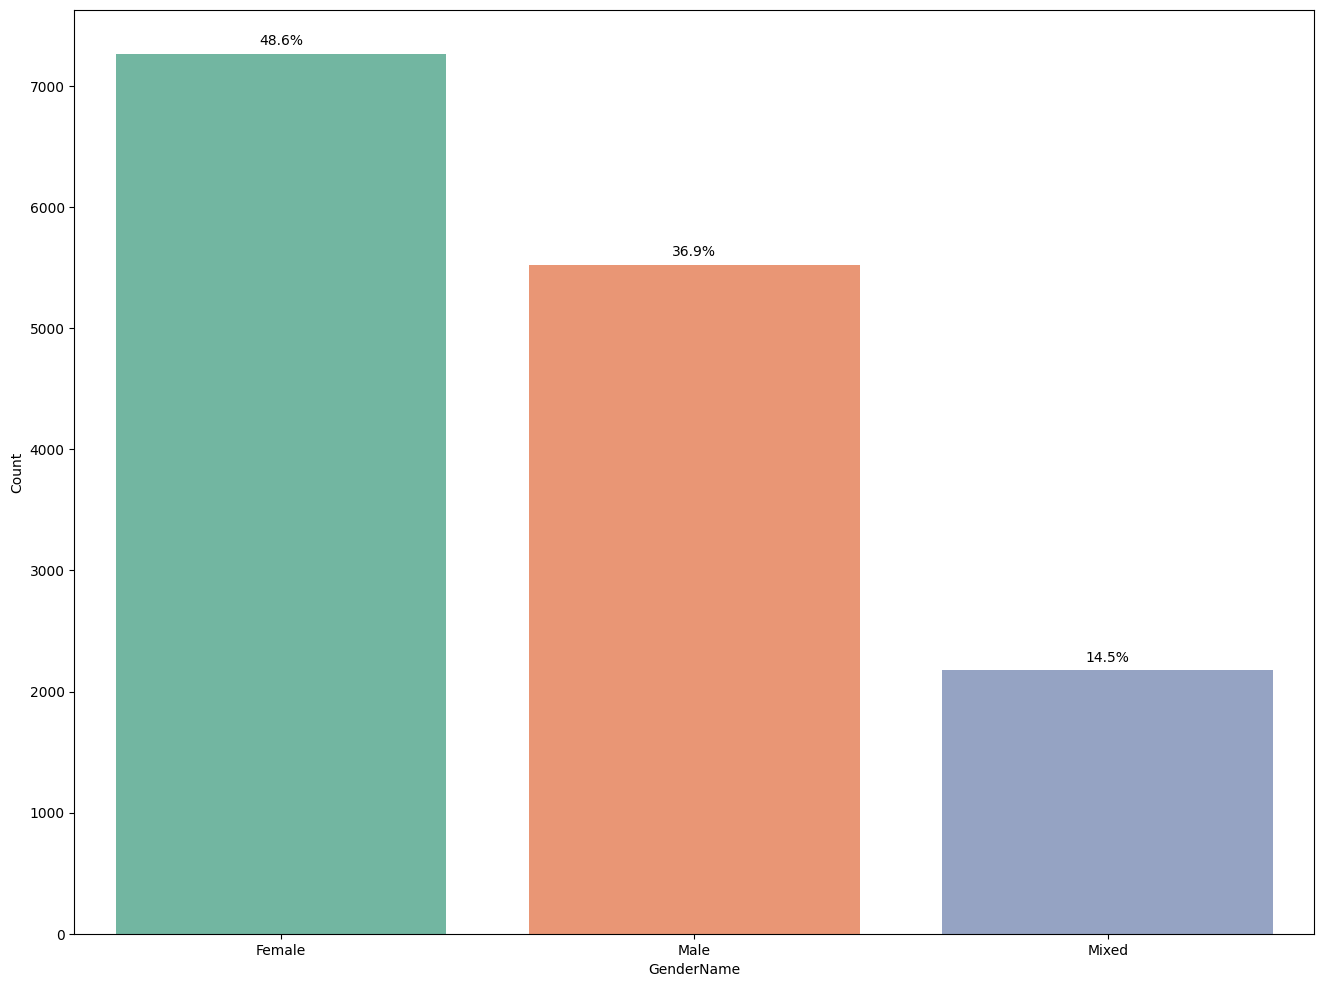

MaturitySizeName


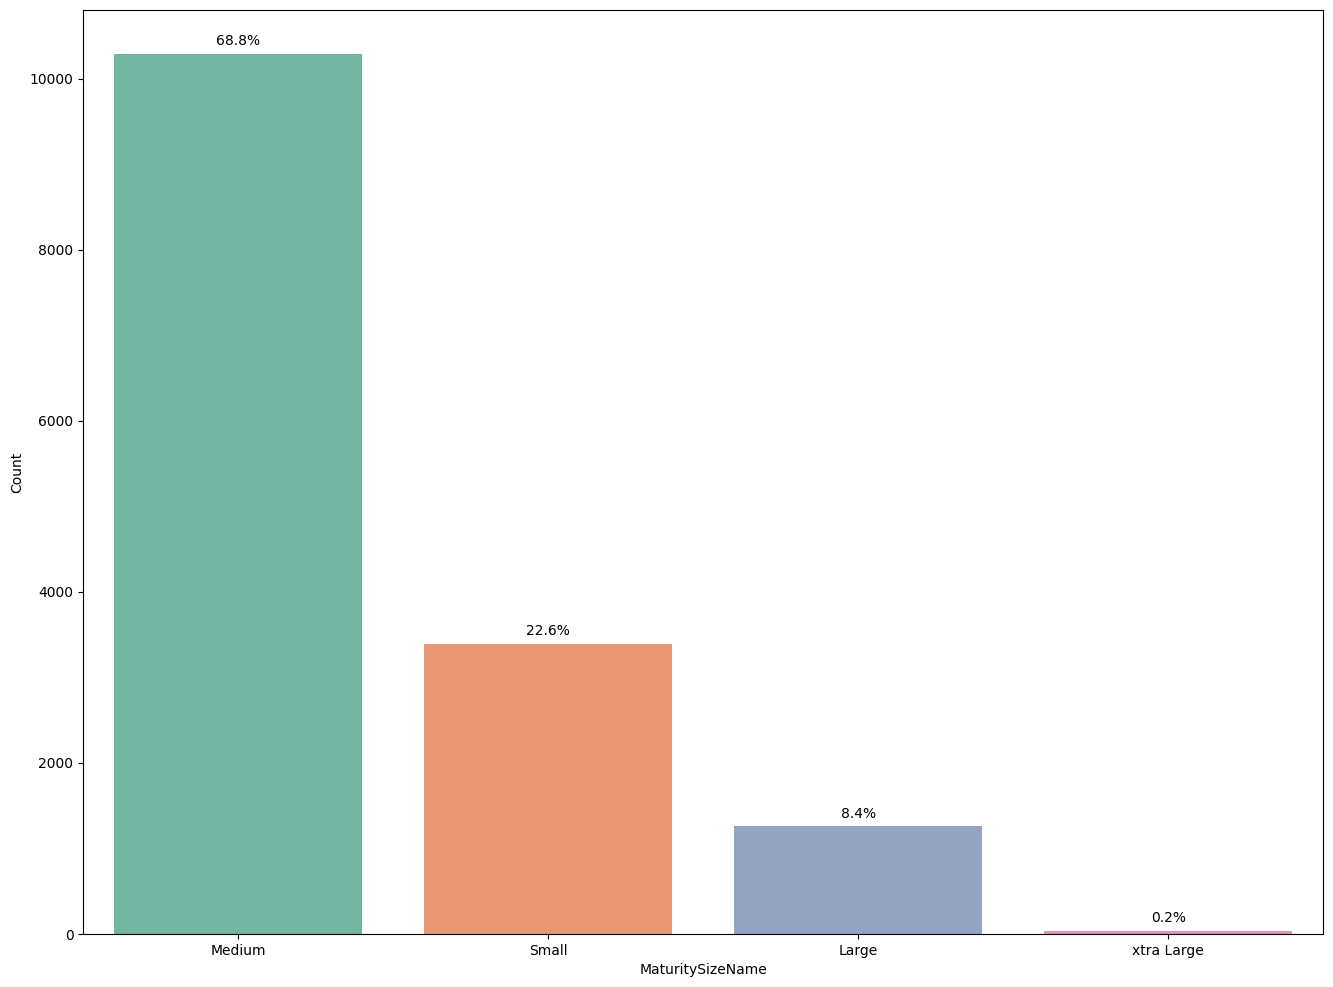

FurLengthName


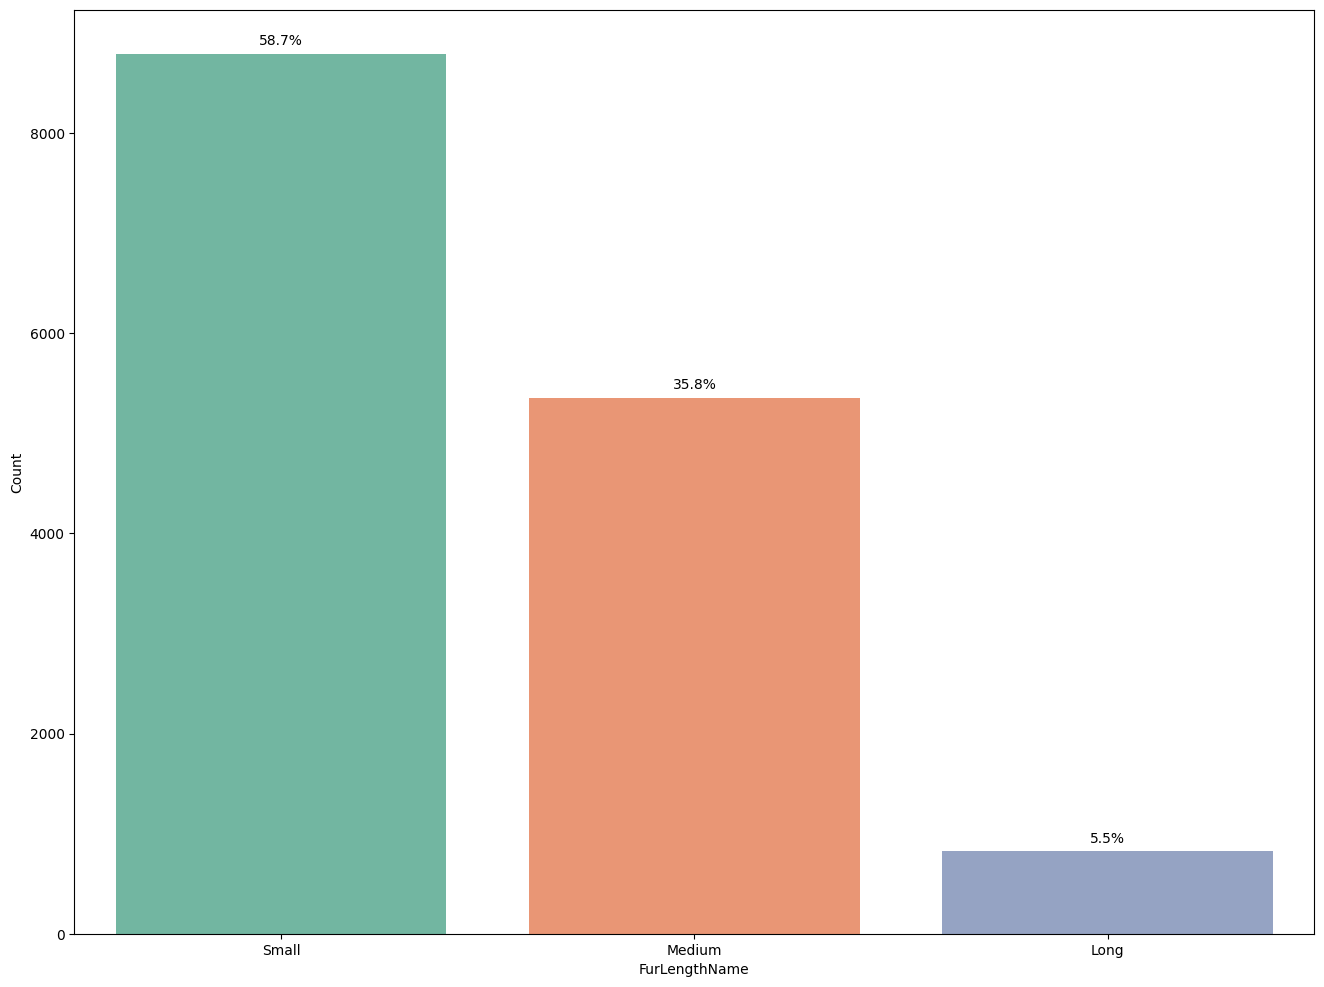

HealthName


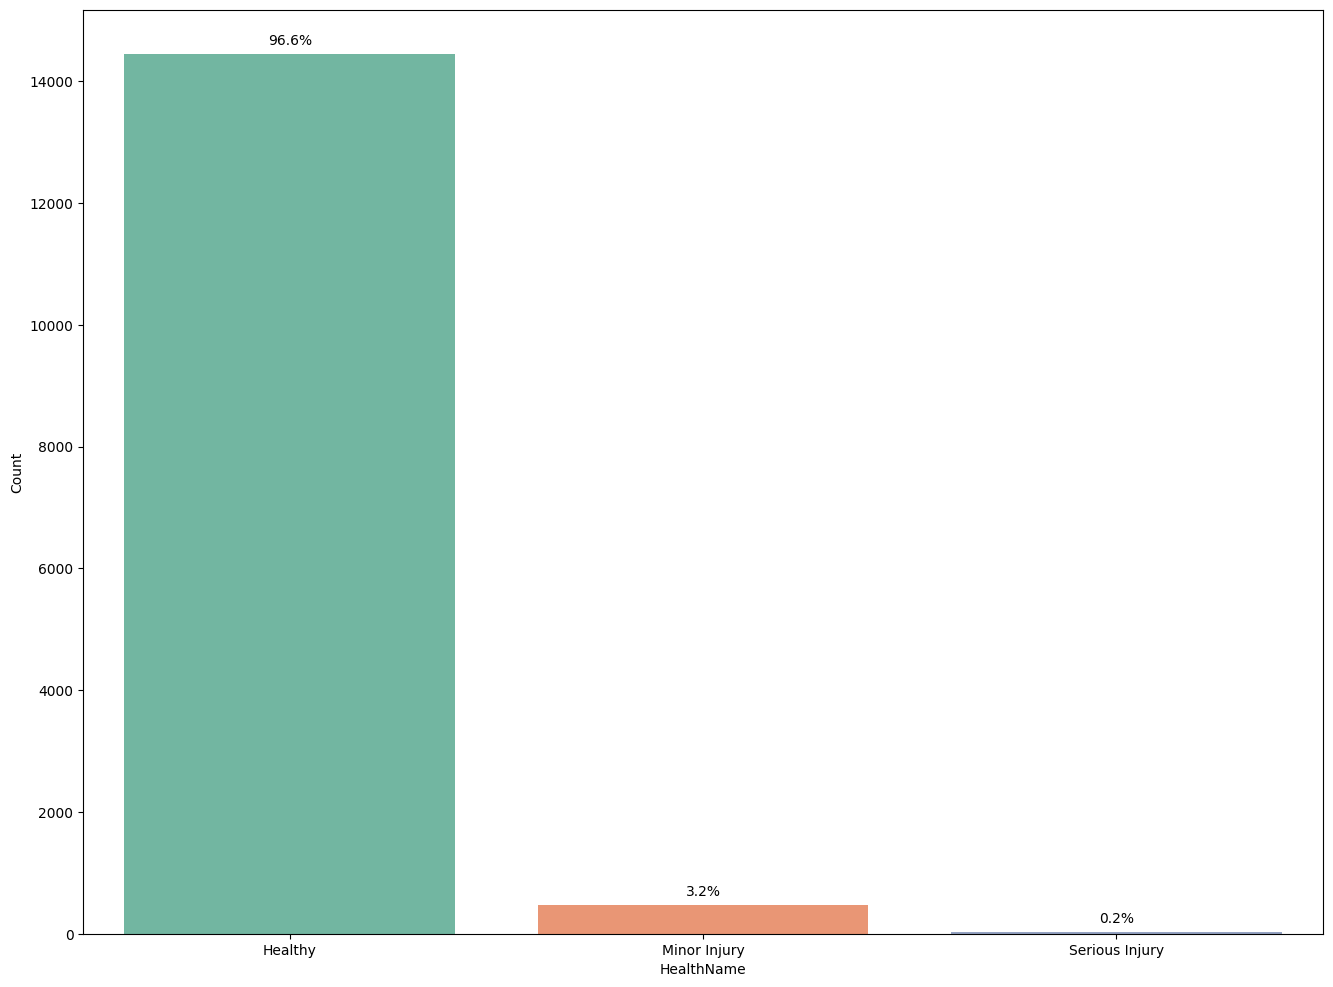

VaccinatedName


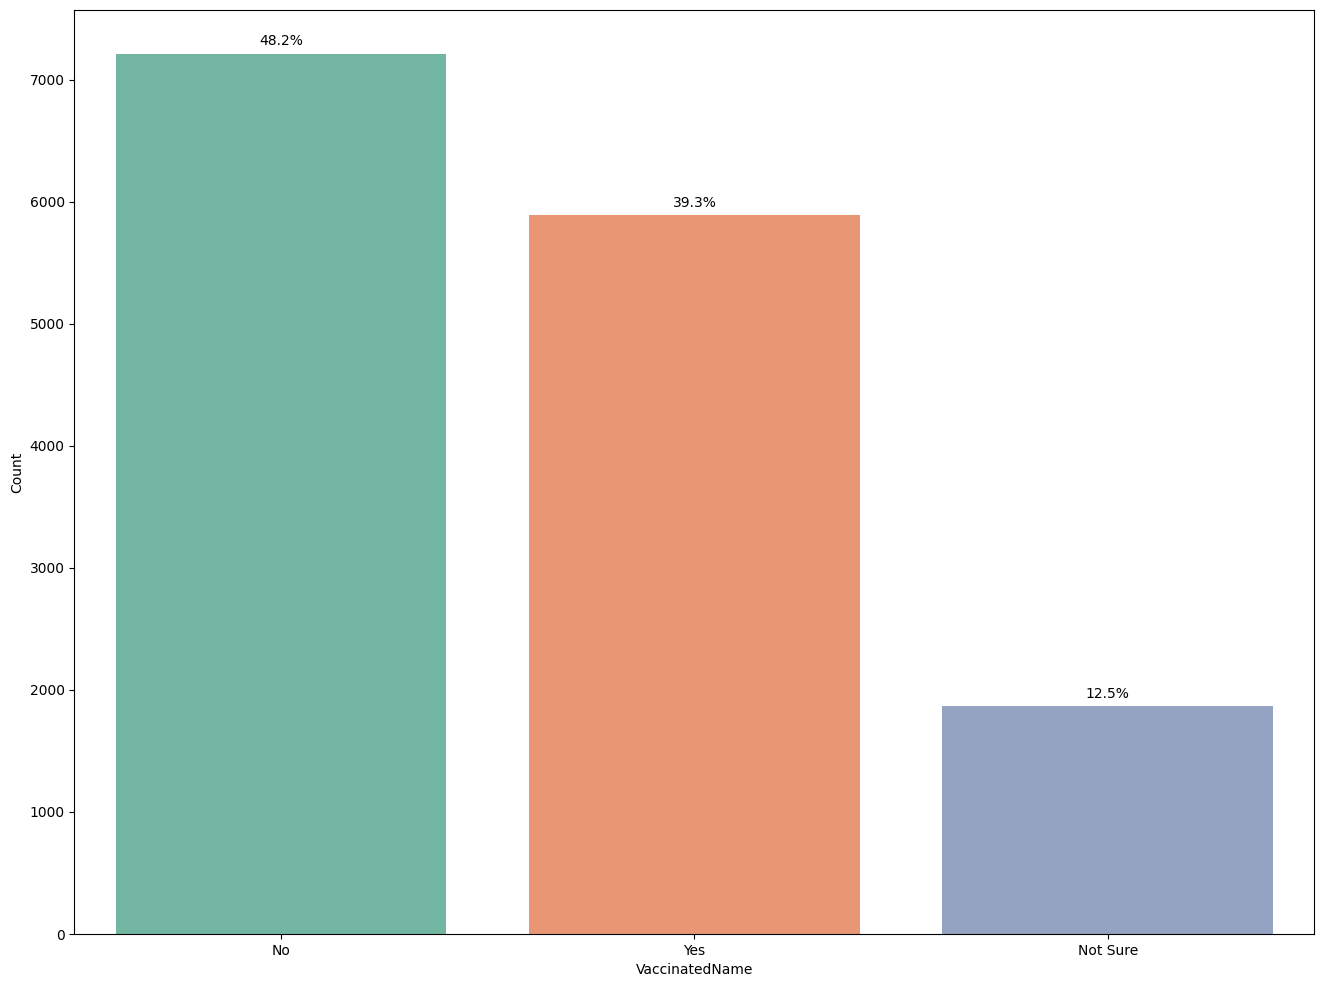

DewormedName


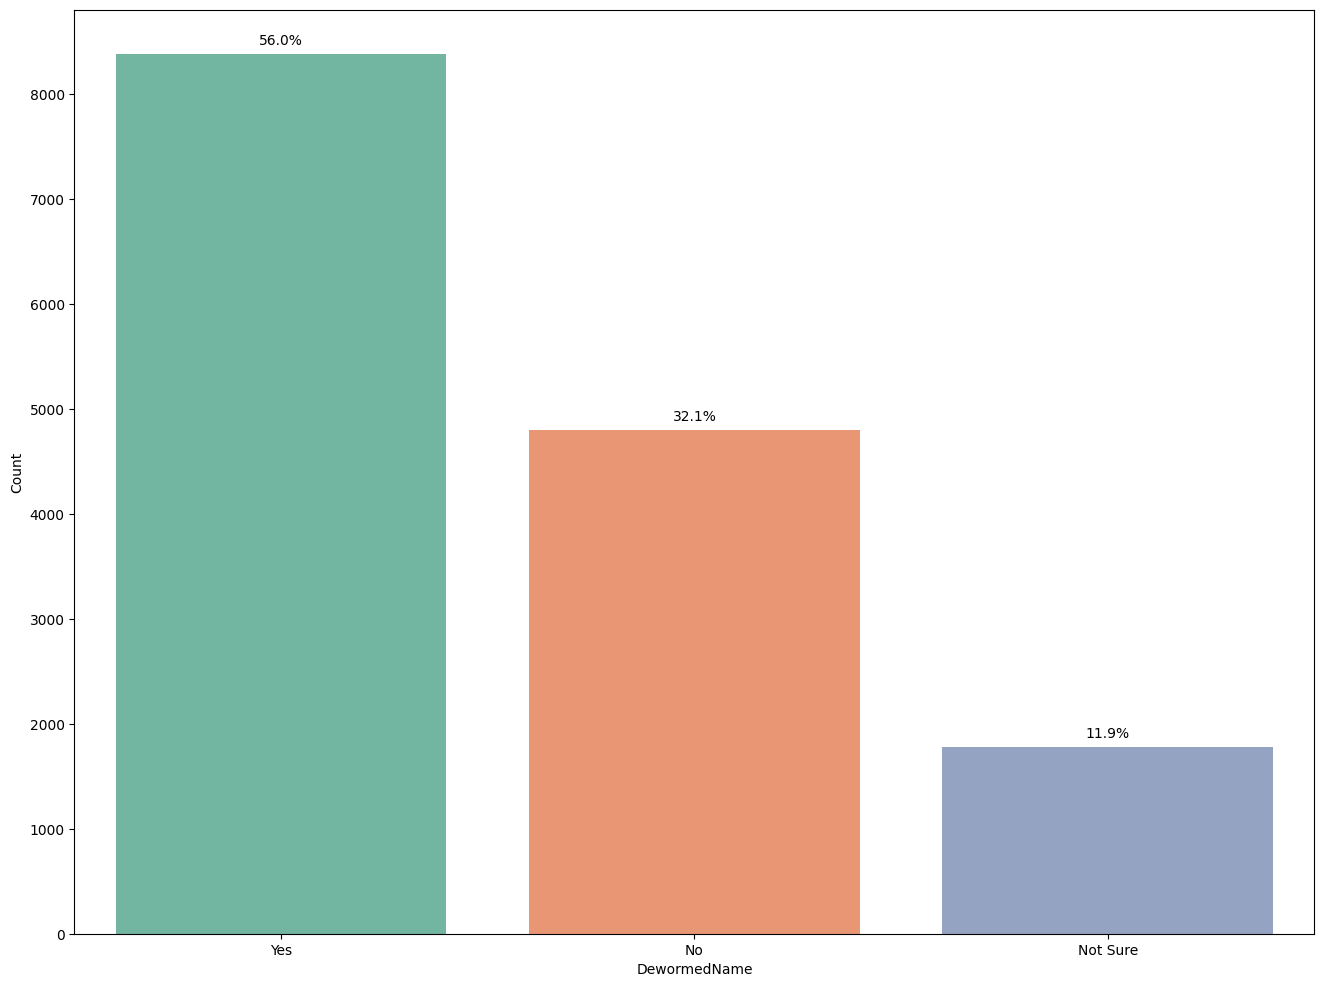

SterilizedName


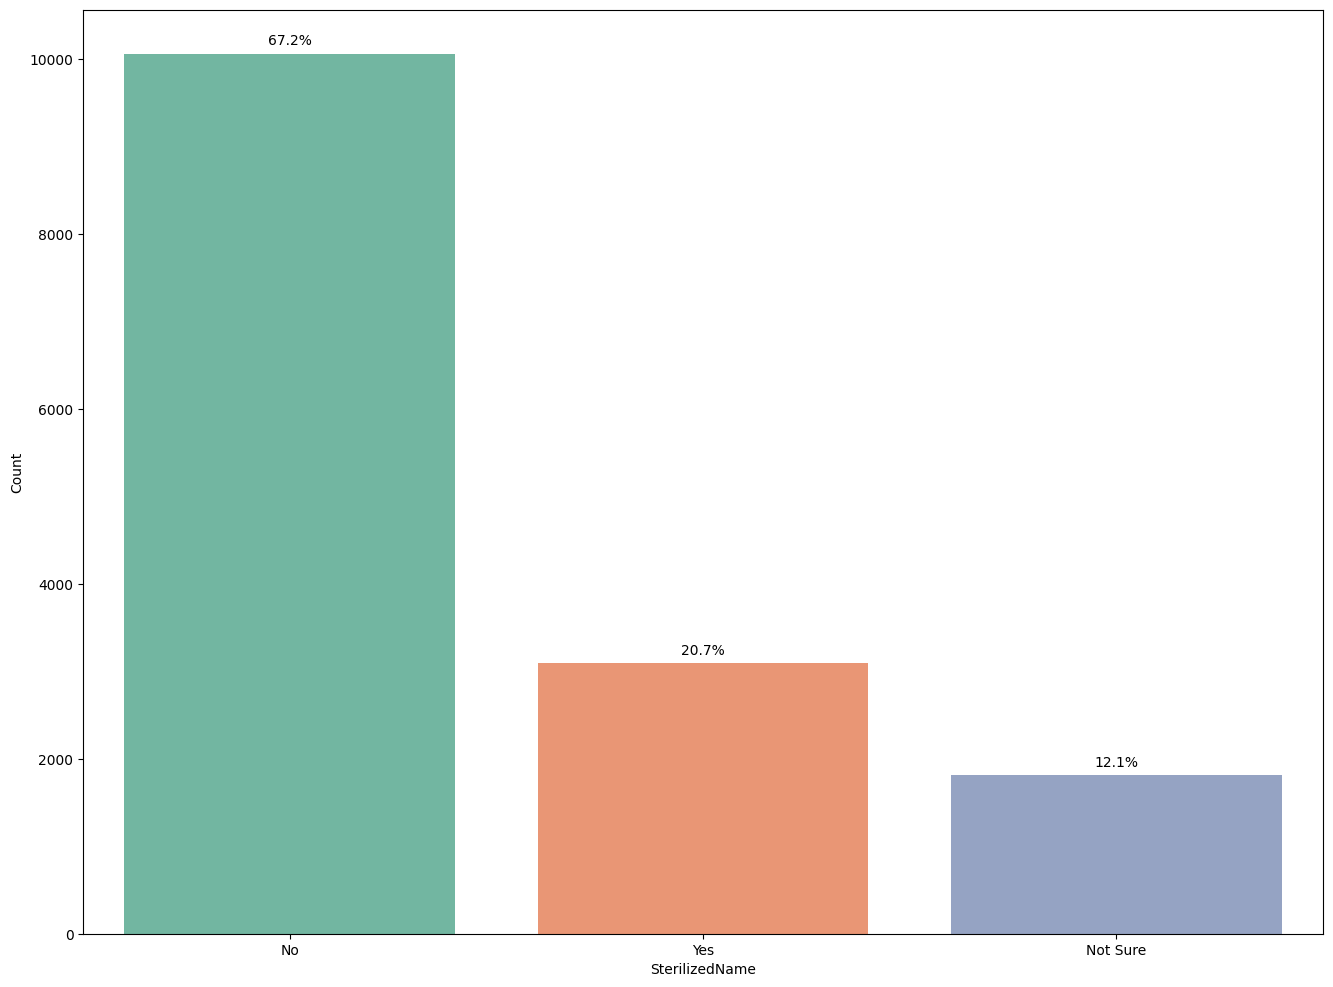

column BreedName has many unique values n = 175 and will not be plotted
StateName


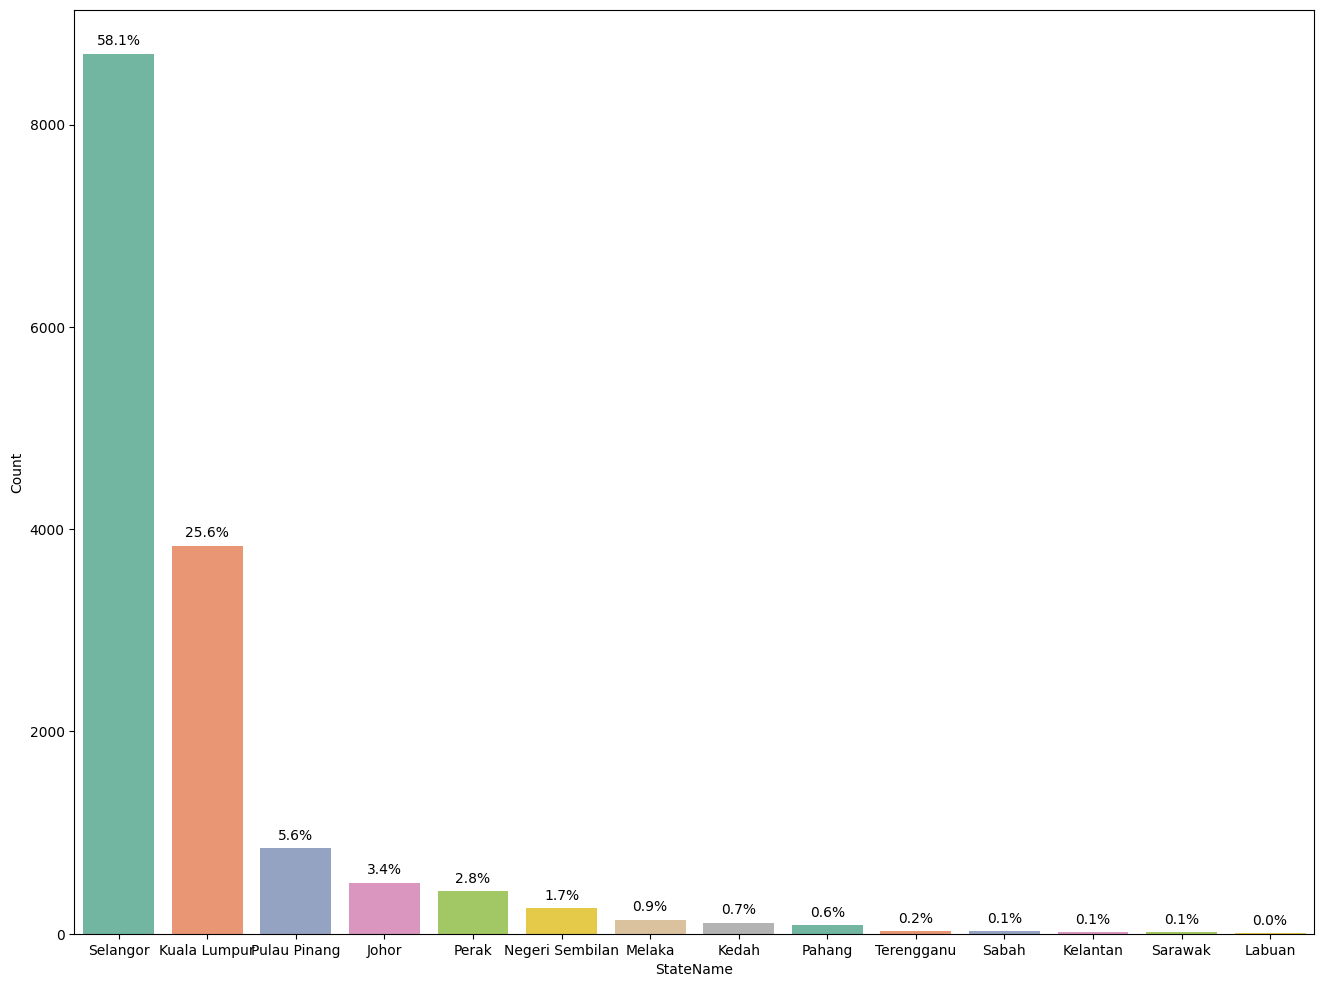

ColorName


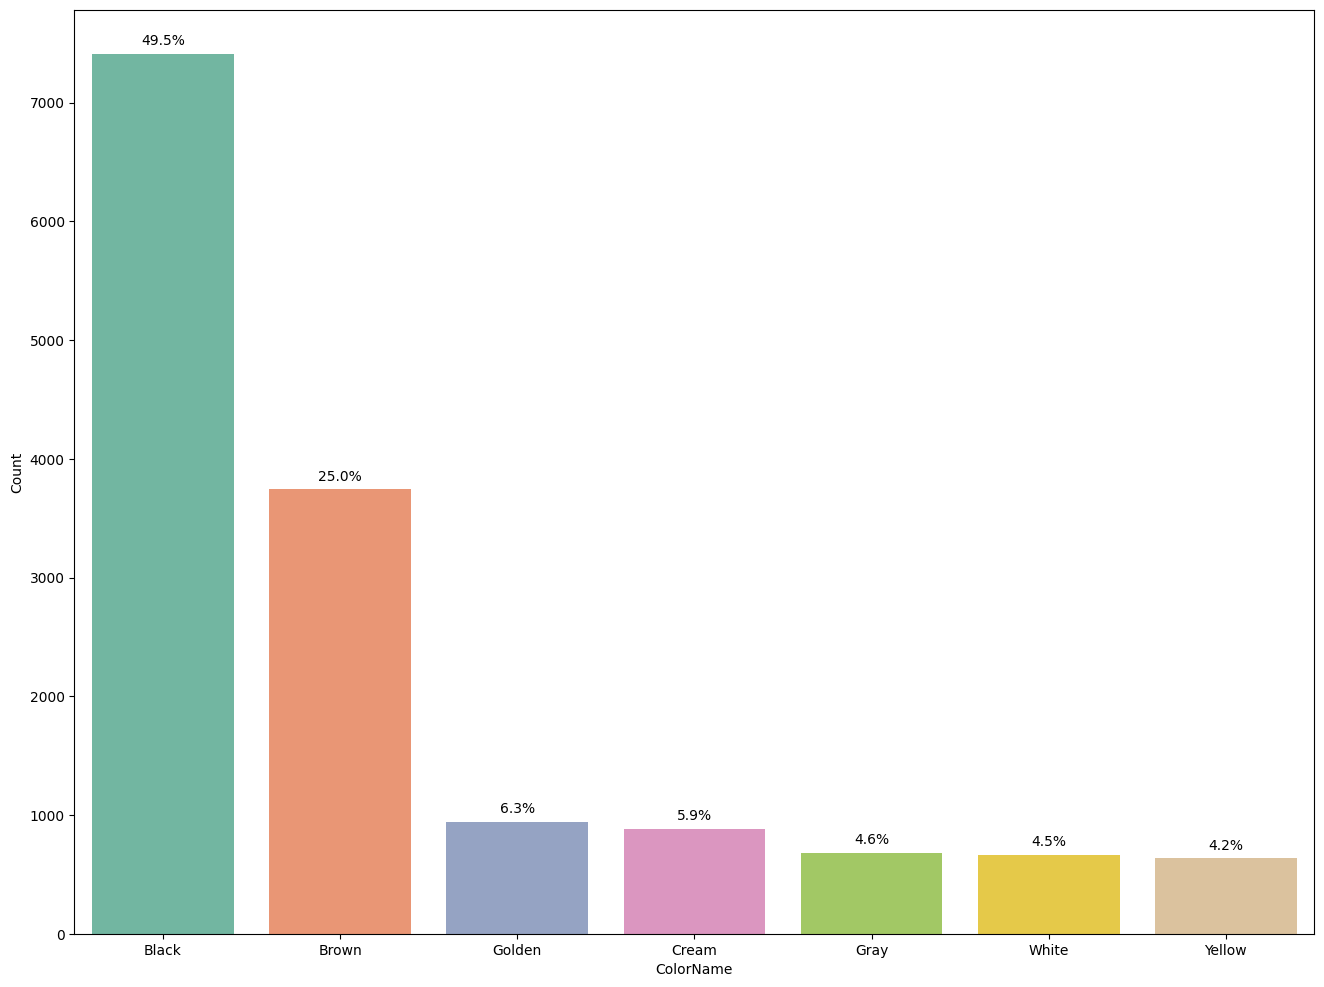

In [189]:
for feature in df.columns:
    if feature in categorical_features:
        eda_univariate_categorical(df, categorical_feature=feature)

#### **Interpretation of Results**:

**AgeBins**: The majority of animal are from 0 to 6 months. From 6-24 months, the number in each bins is evenly distributed at around 10% and only 3.9% animals are more than 5 years old

**FeeBins**: Most animal are free to adopt with 84.5%. Fewer animals have adoption fee greater than 200, only 8.5% in total.

**VideoAmtBins**: Left-skewed. Most animals do not have any video in their posts. Only 2.8% animals have one video and other 1% have 2 videos 

**PhotoAmtBins**: The majority of animals have at lease 1 photo in their post ~ 97.7%. The number of animals seems less when the number of photos increases

**QuantityBins**: The majority of items have only one animal ~ 77.2%. And the number of items in each bins decreases when the quantity increases

**BreedPure**: The number of breedpure animals are less than the number of not-breed-pure animals.

**NameorNO**: Most animals are named, only 9.1% animals are unnamed.

**TypeName**: The number of dogs and cats in the data are not so different at 54.3 and 45.7%, respectively.

**GenderName**: About half of animal listed are female. Other 36.9% are male and the rest are mixed sex (group of pets).

**MaturitySizeName**: About two-thirds of animals are medium in size. The number of XLarge animals is significantly low at 0.2%.

**FurLengthName**: Most animals have short or medium fur length, the number of long fur animals is quite low compared to other 2 types at 5.5%.

**HealthName**: Most animals are healthy, only 3.2% animals have minor injury and 0.2% animal have serious injury

**VaccinatedName**: Half of the animals are NOT vacinatted, while for other half, 39.3% are vaccinated, and others are not sure

**DewormedName**: More than a half of animals are dewormed and others are not sure or not dewormed yet.

**SterilizedName**: 67.2% animals are sterilized, and 20.7% animals are not. And the rest are not sure

**StateName**: The majority of animals are adopted in 4 big cities: Selangor, Kualar Lumpur, Pulau Pinang, and Johor, with half of the animals are adopted in Selangor. 

**ColorName**: The mojority of animals are either black and brown with total of 74.5%. The rest are evenly distributed among 5 other colors: golden, cream, gray, white and yellow


#### **Decisions made**: 

- For BreedName, I only keep the top 12 most common breed names (6 for dogs and 6 for cats), then combine other classes into 'Other' to reduce the cardinality
- Since the number of categorical data are quite huge and the number of categories is also big, if I use one hot encoding, the feature space will be enormous and the data is quire spare. Many models will face with the curse of dimensionality, therefore, I decide to go with models that do not require one hot encode and has native support for categorical data. **LightGBM** for example 

### **Univariate analysis for numerical features**

Age


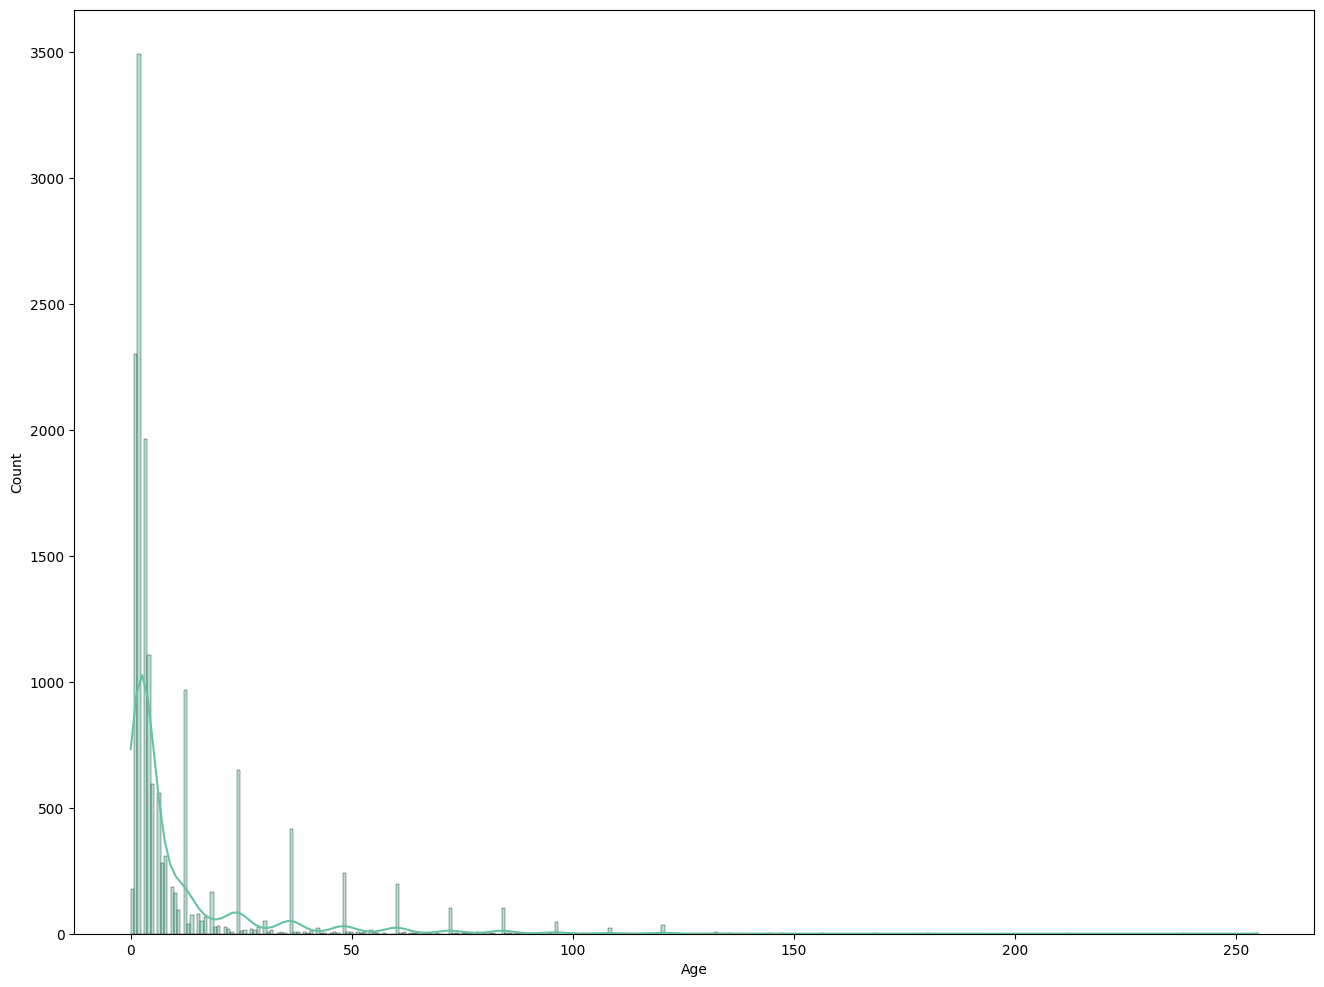

Quantity


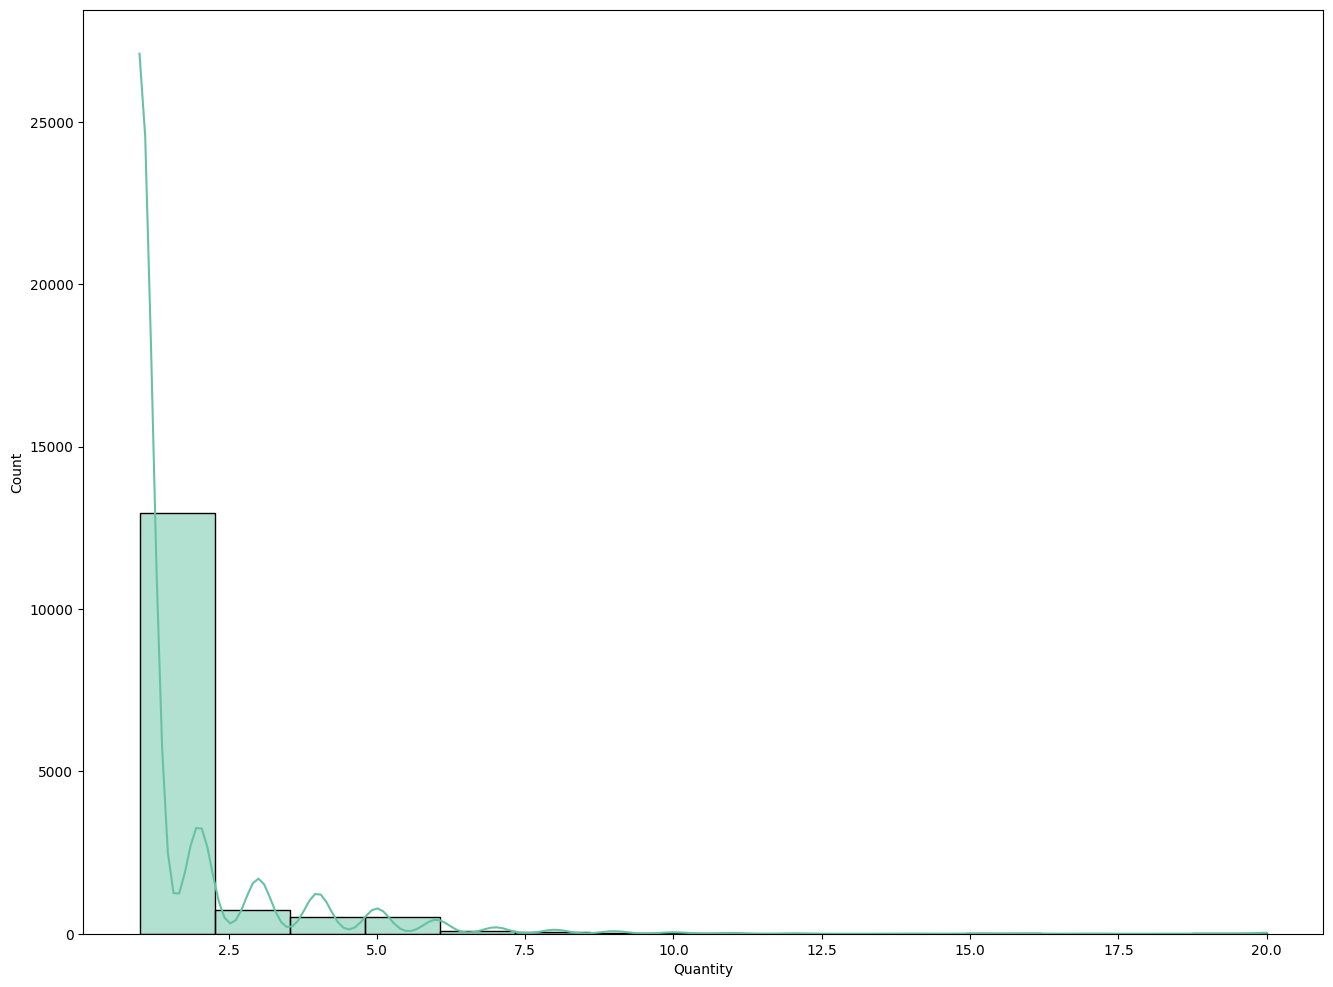

VideoAmt


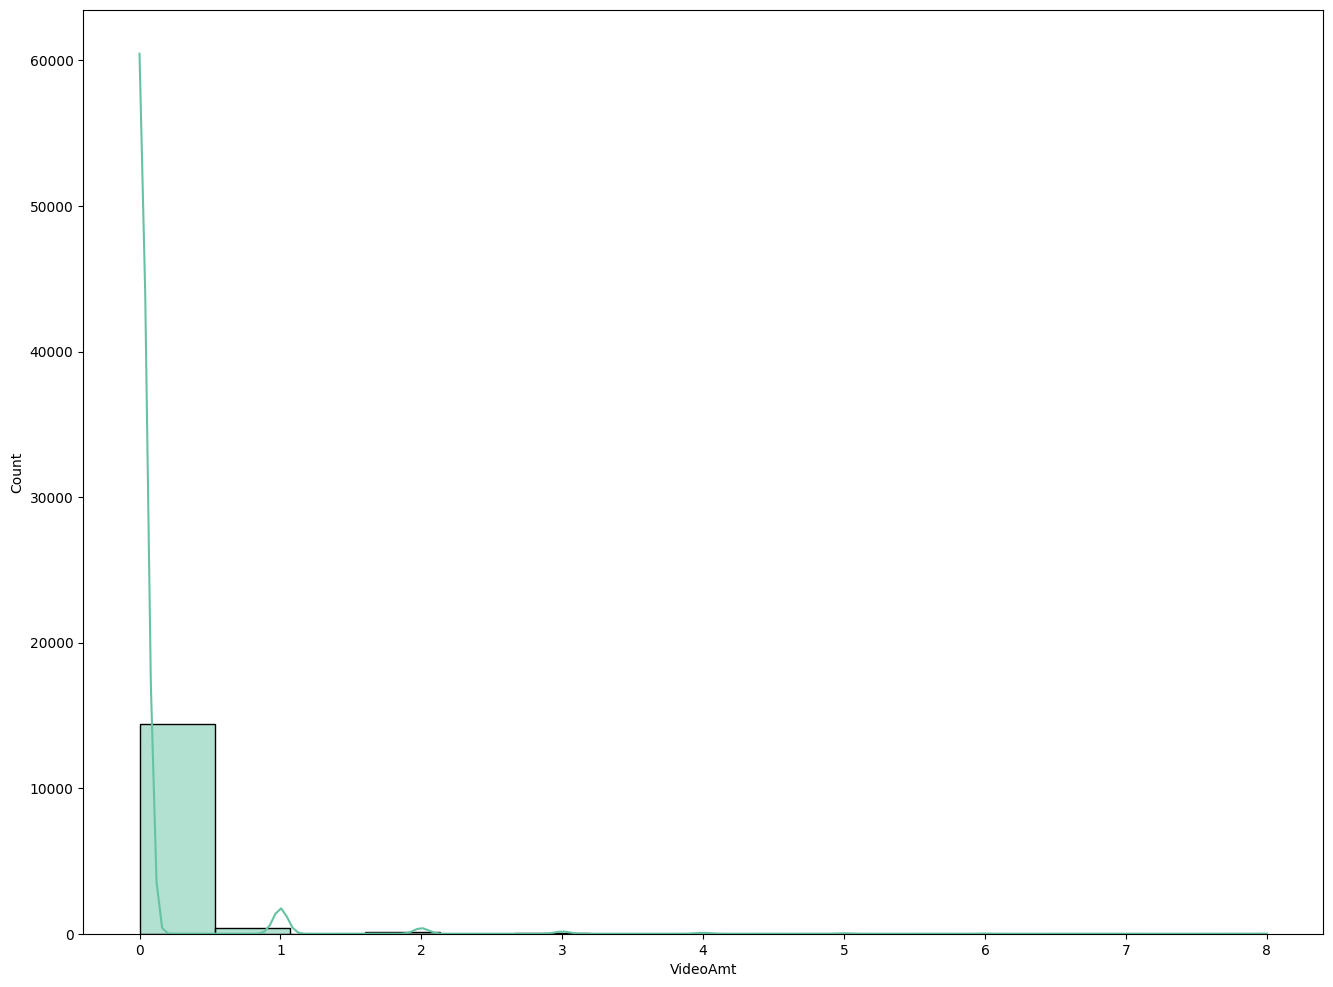

PhotoAmt


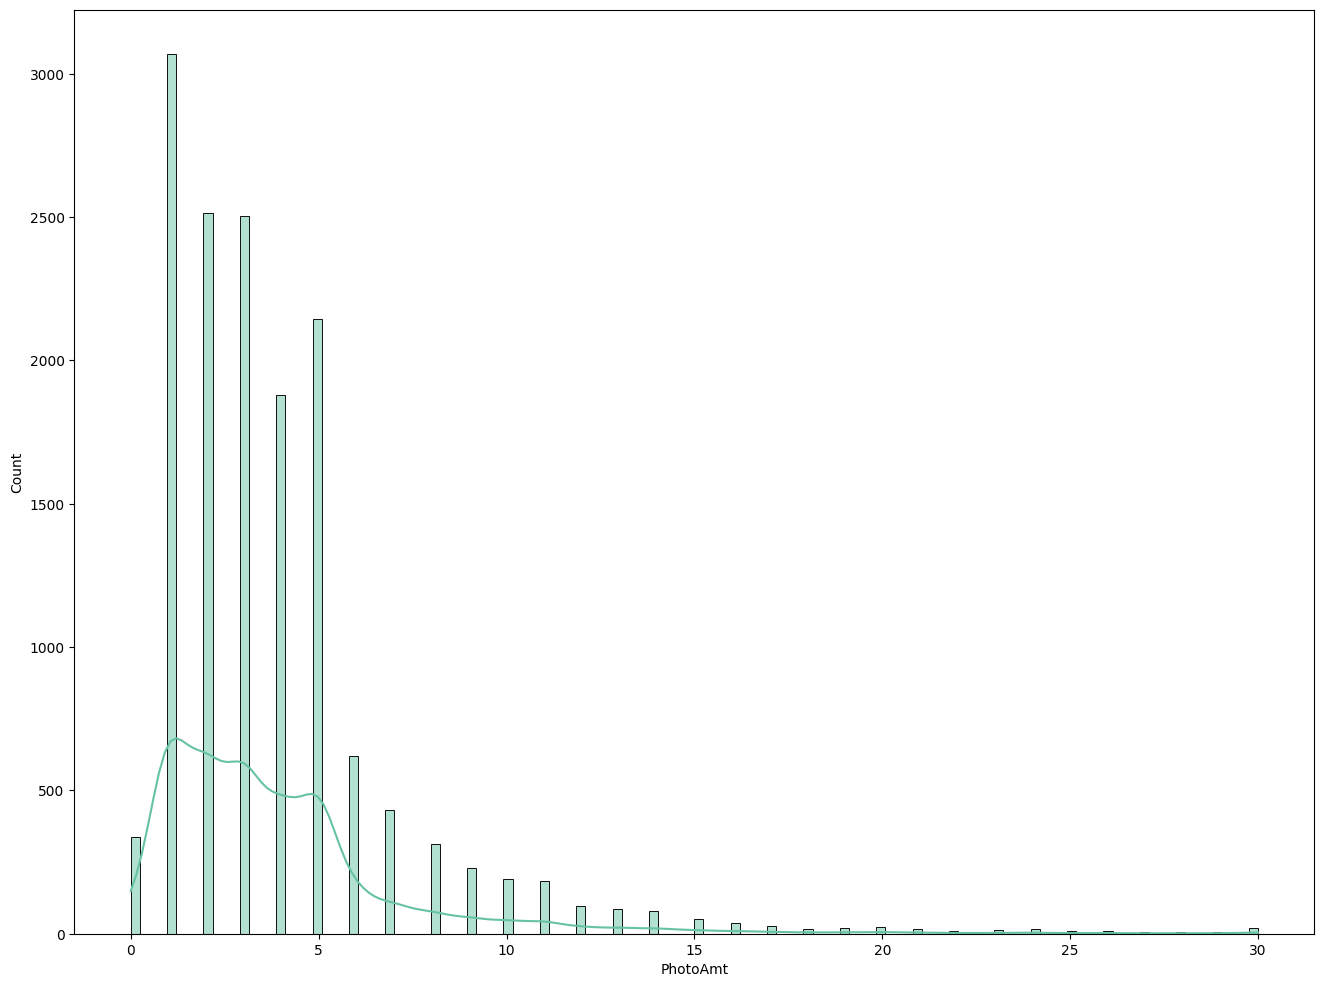

In [190]:
for feature in df.columns:
    if feature in numerical_features:
        eda_univariate_numerical(df, numerical_feature=feature)

#### **Interpretation of Results**:

**Age**: The age distribution follows a normal distribution and quite left skewed. The majority of animal are from 0 to 6 months.

**Quantity**: The majority of items have only one animal. The number of items that have more than 6 animals is insignificant 

**PhotoAmt**: The majority of animals have at lease 1 photo in their post. The number of animals that have more than 10 photos is insignificant.

**VideoAmt**: Most animals do not have any video in their posts. The number of animals that have more than 2 video is insignificant.


#### **Decisions made**: 
For data preprocessing, I decided to limit the number, since the number of entries after that limit are insignificant.
- **Quantity**: Replace all values greater than 6 with 6

- **PhotoAmt**: Replace all values greater than 10 with 10

- **VideoAmt**: Replace all values greater than 2 with 2
 

### **Bivariate analysis for categorical features**

AgeBins vs. AdoptionSpeed


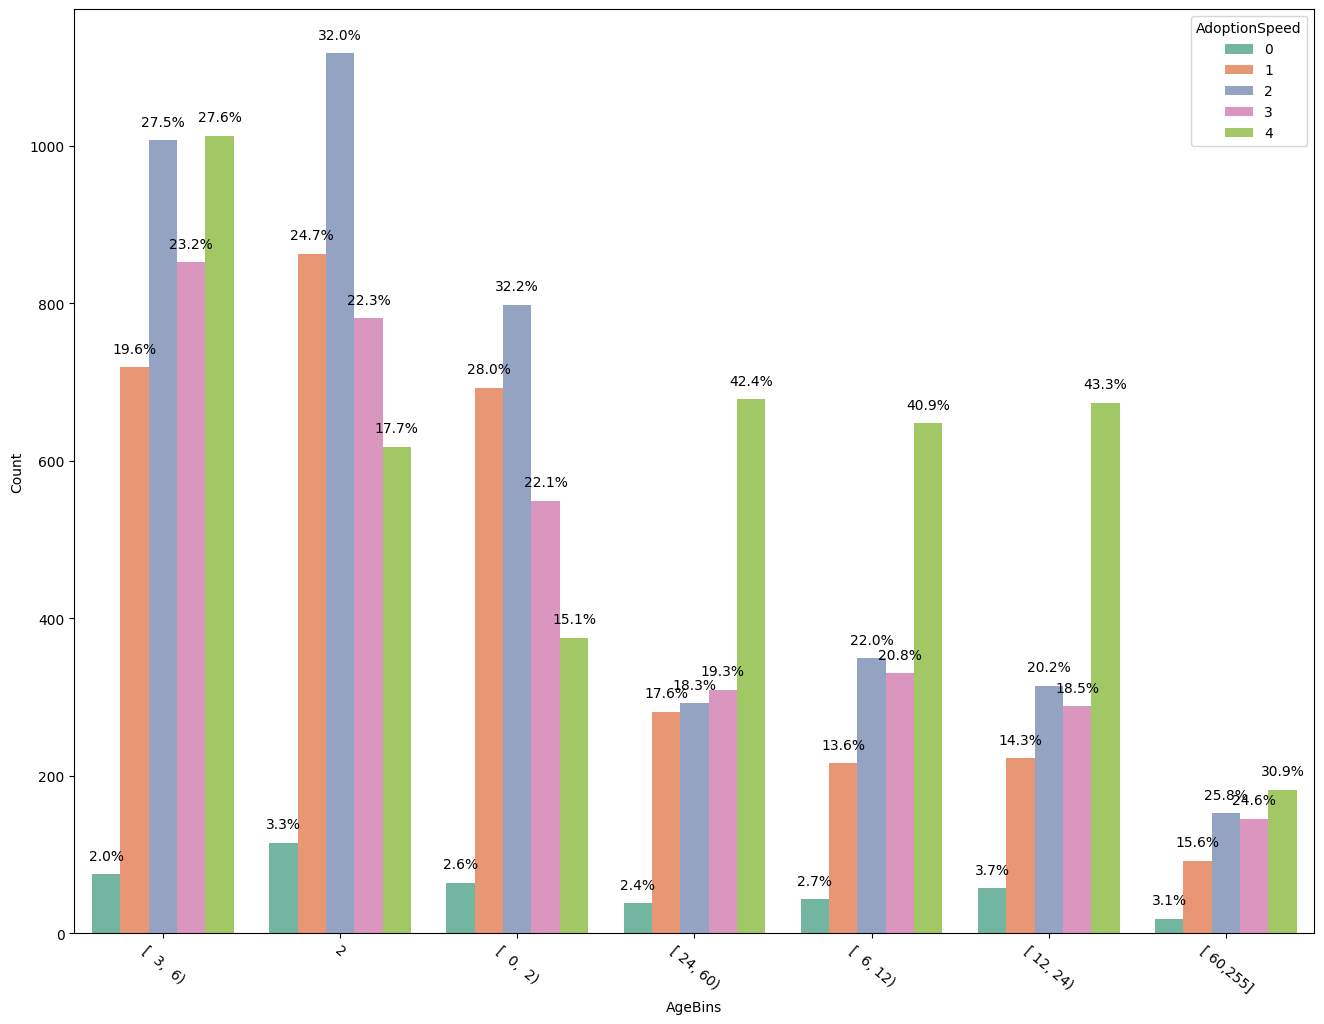

FeeBins vs. AdoptionSpeed


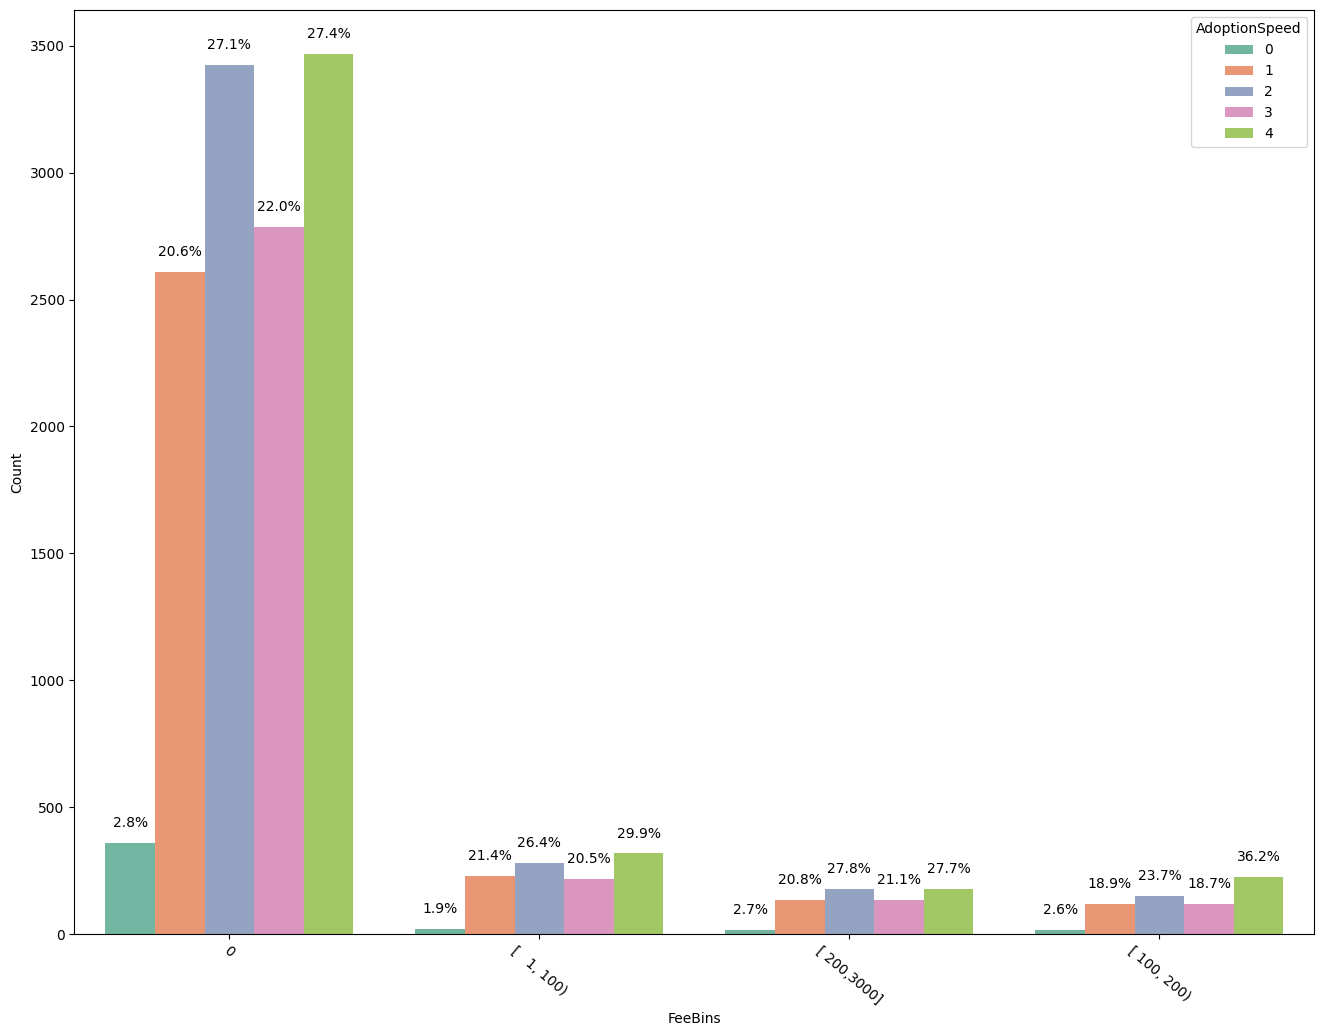

VideoAmtBins vs. AdoptionSpeed


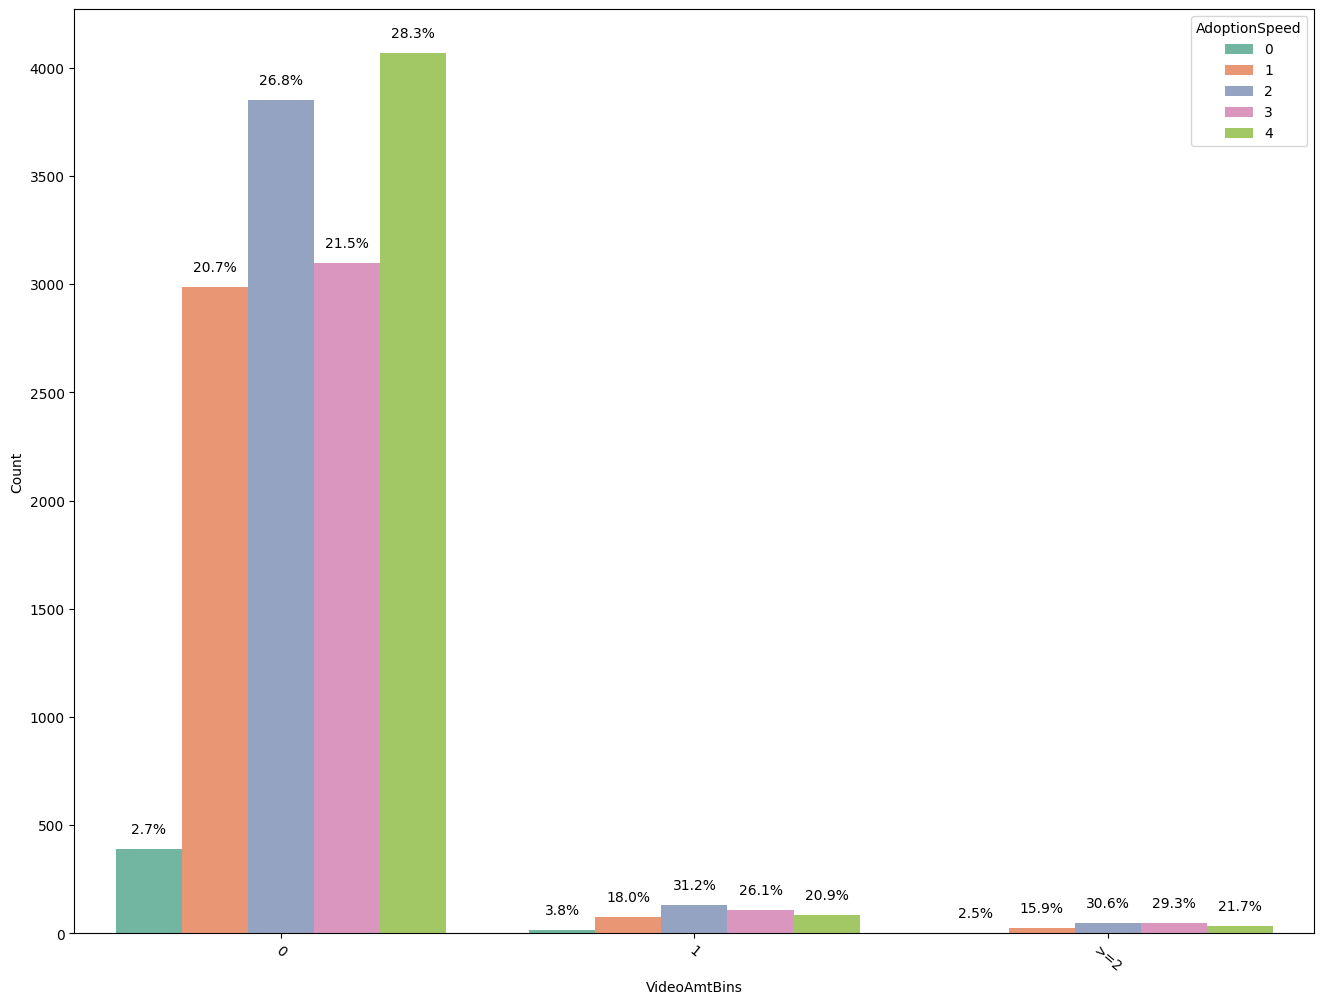

PhotoAmtBins vs. AdoptionSpeed


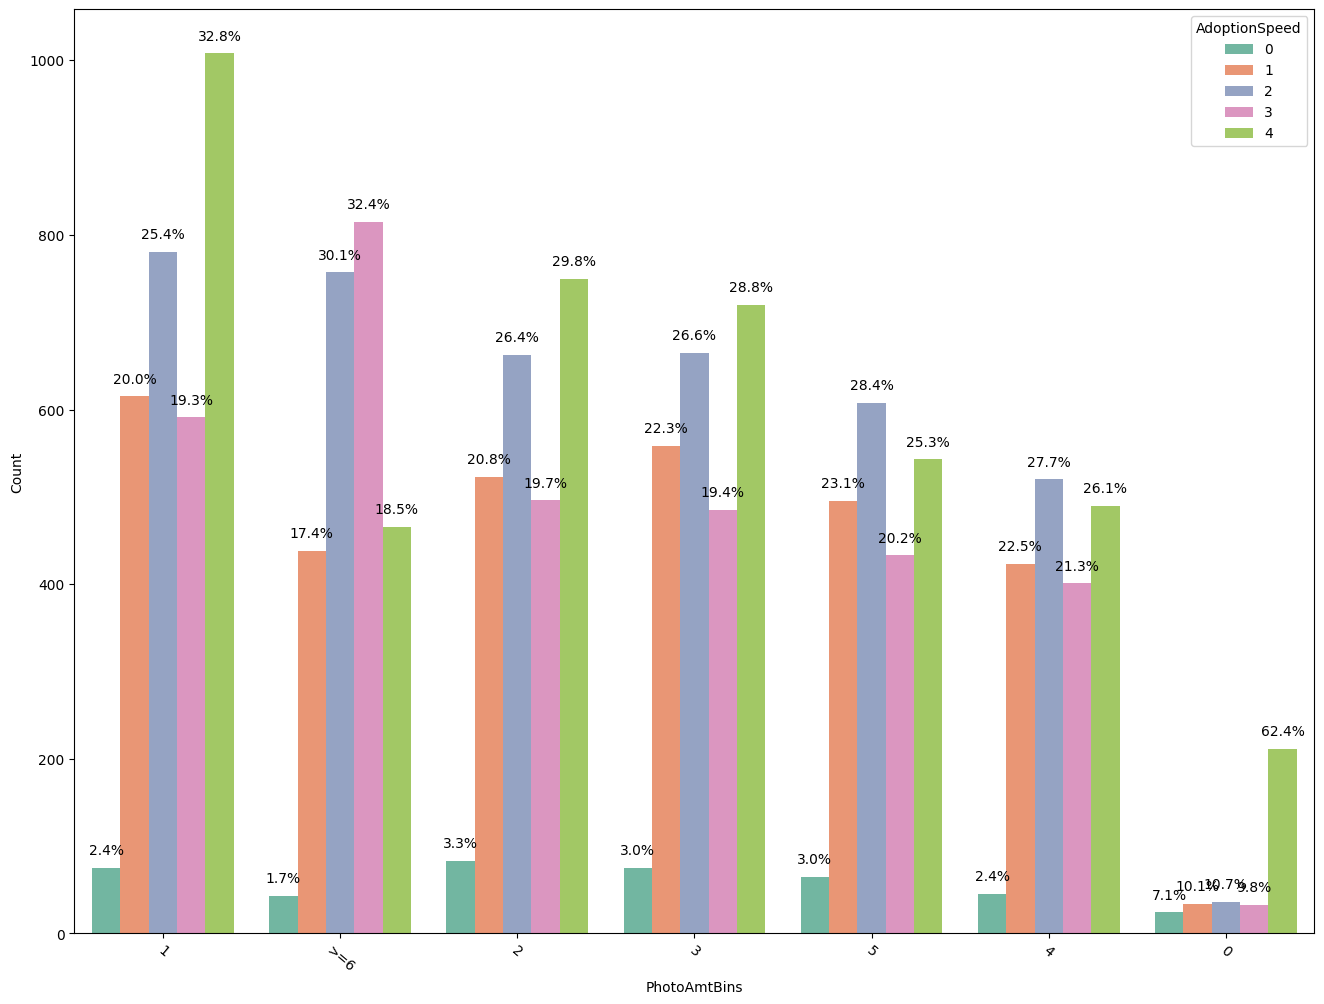

QuantityBins vs. AdoptionSpeed


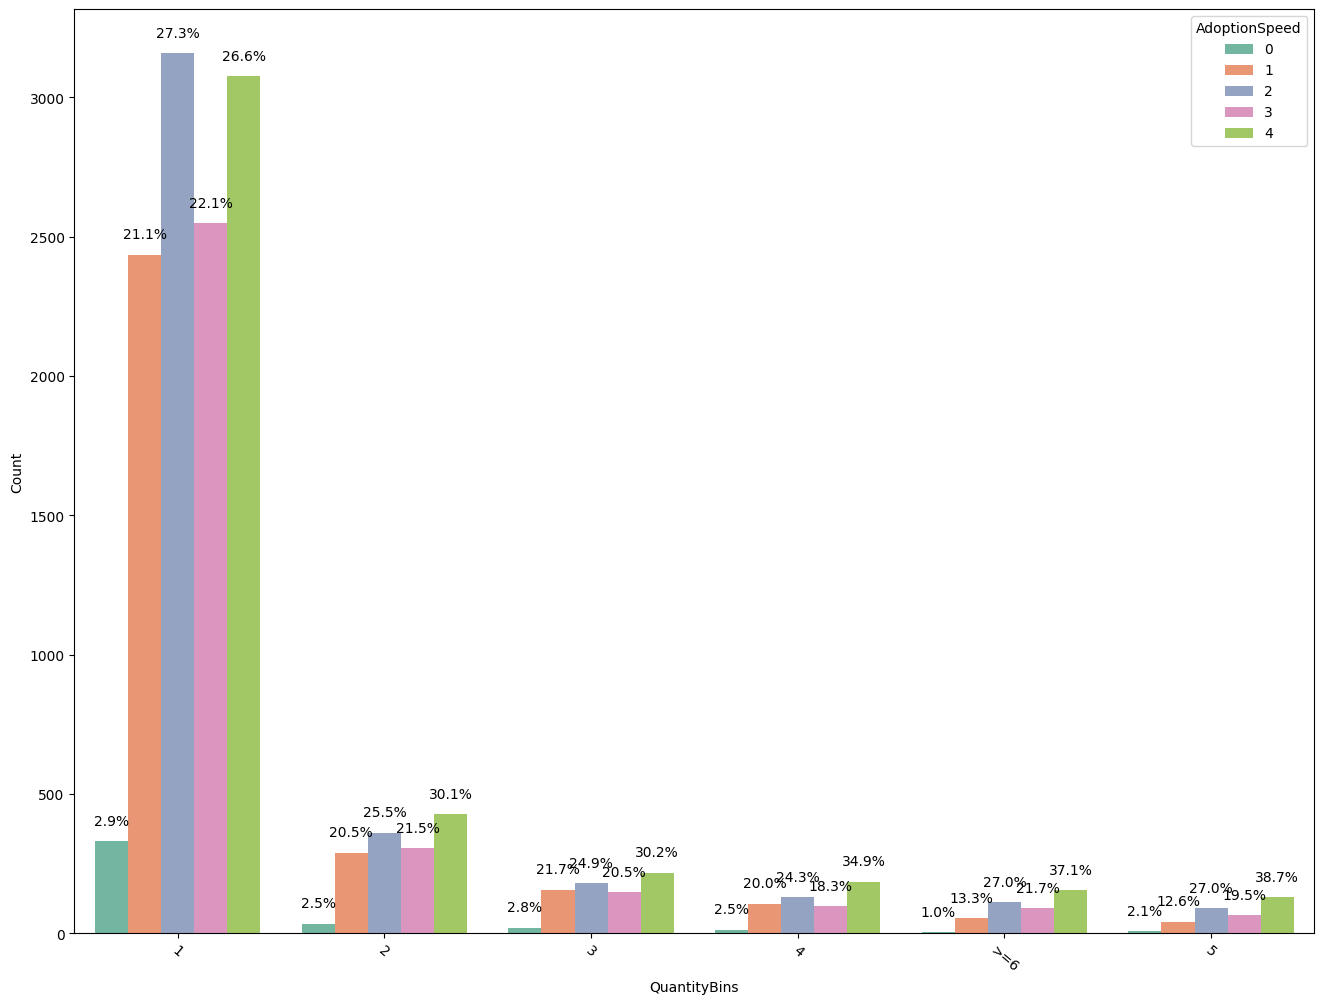

BreedPure vs. AdoptionSpeed


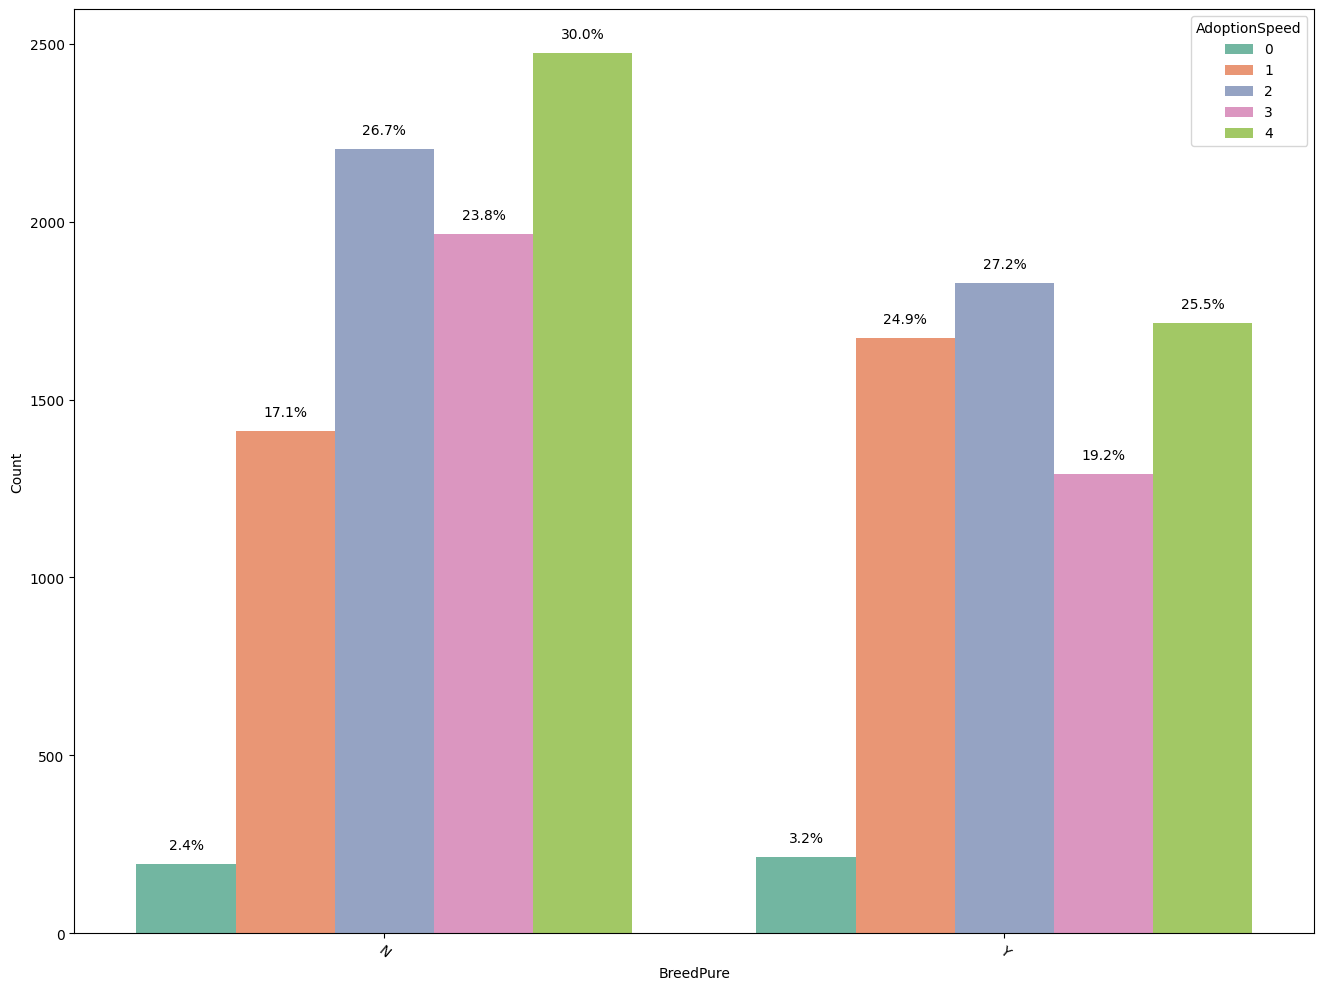

NameorNO vs. AdoptionSpeed


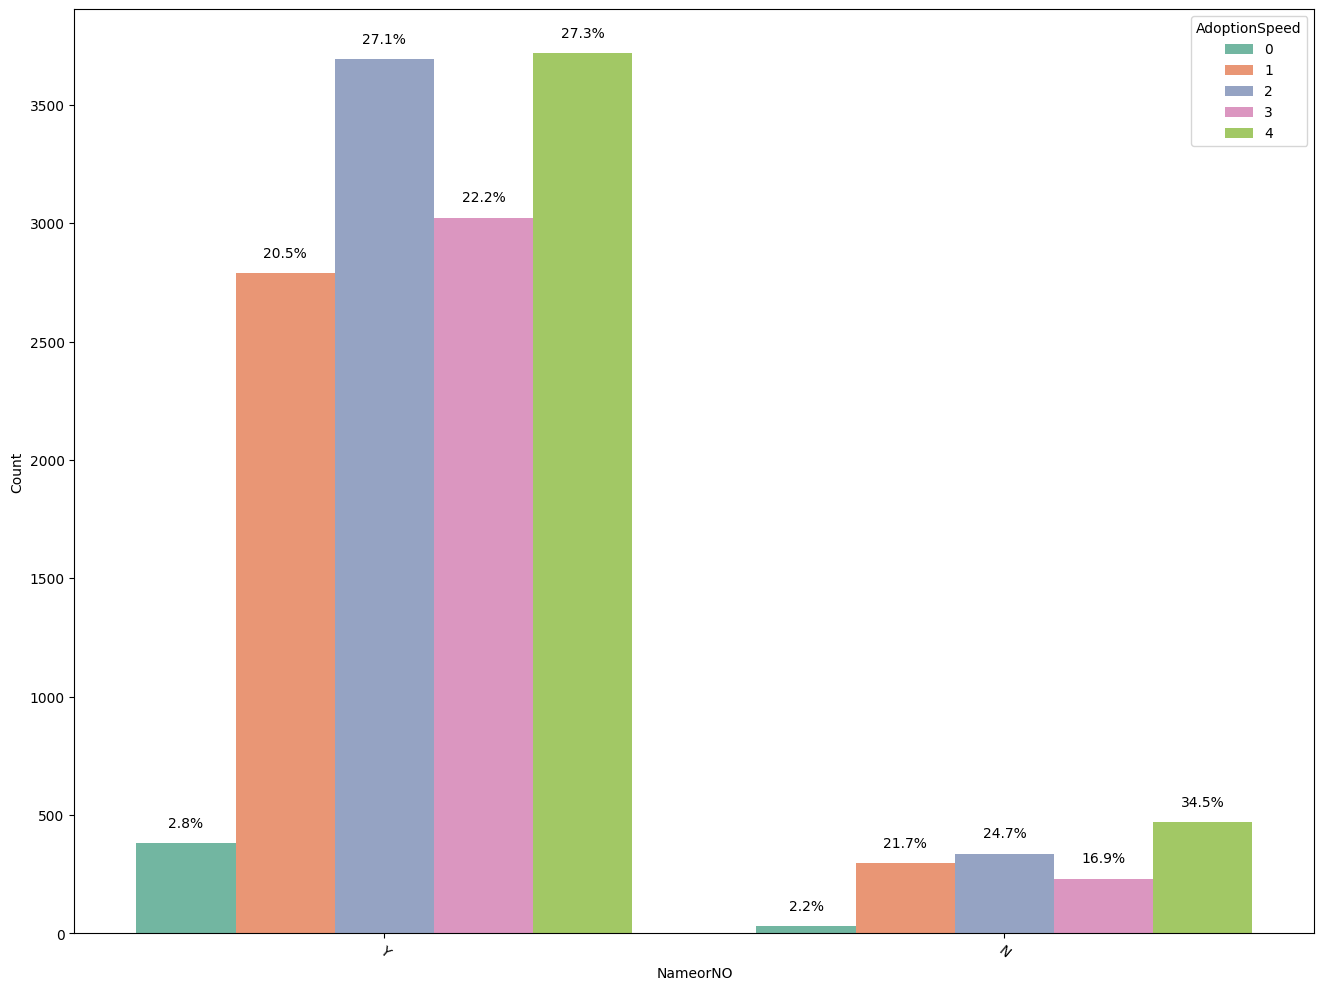

TypeName vs. AdoptionSpeed


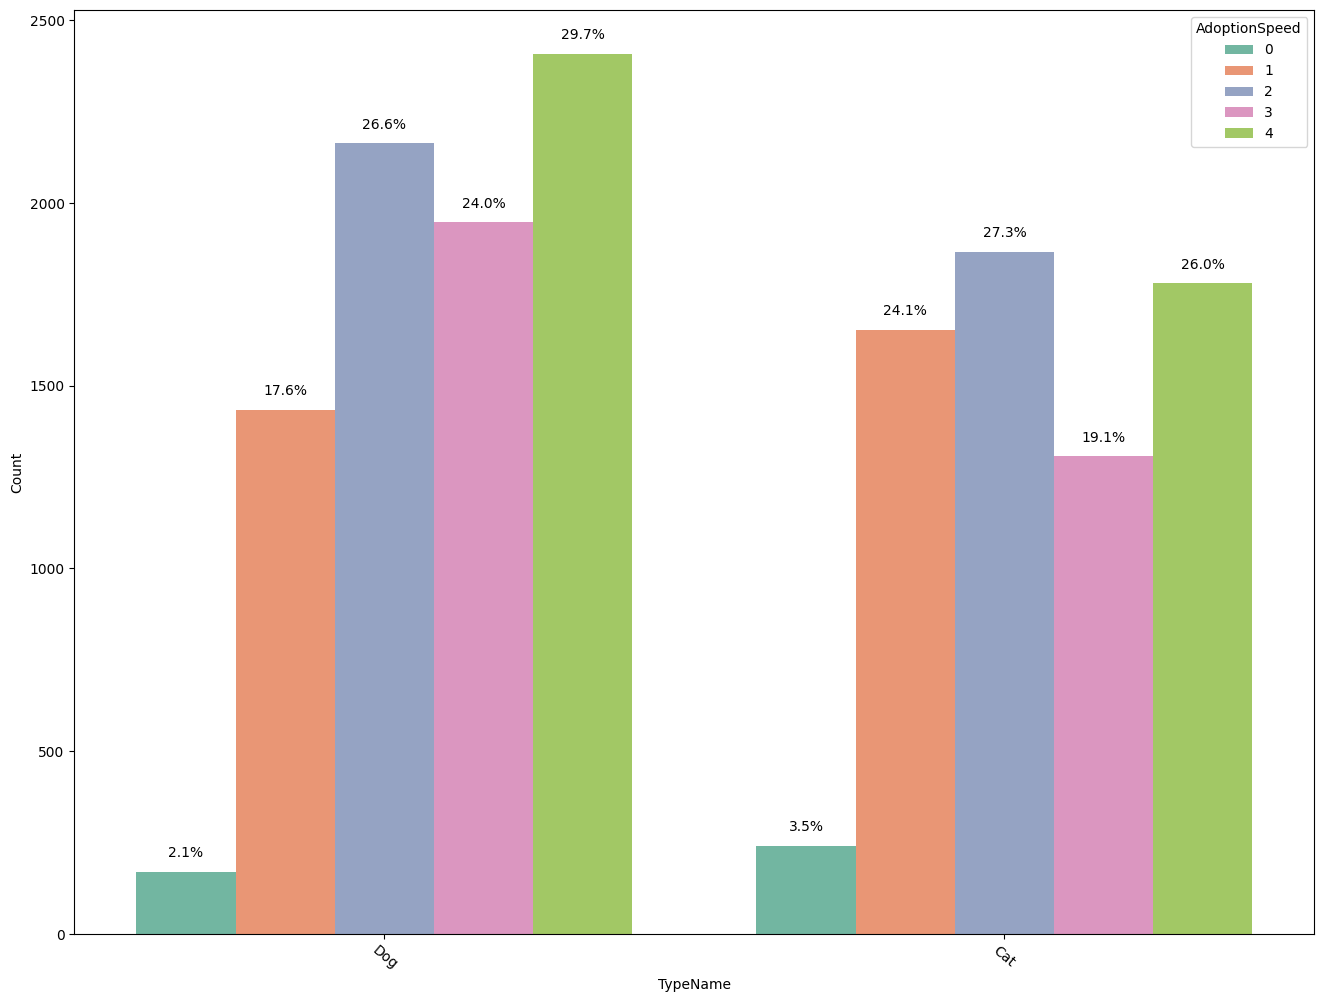

GenderName vs. AdoptionSpeed


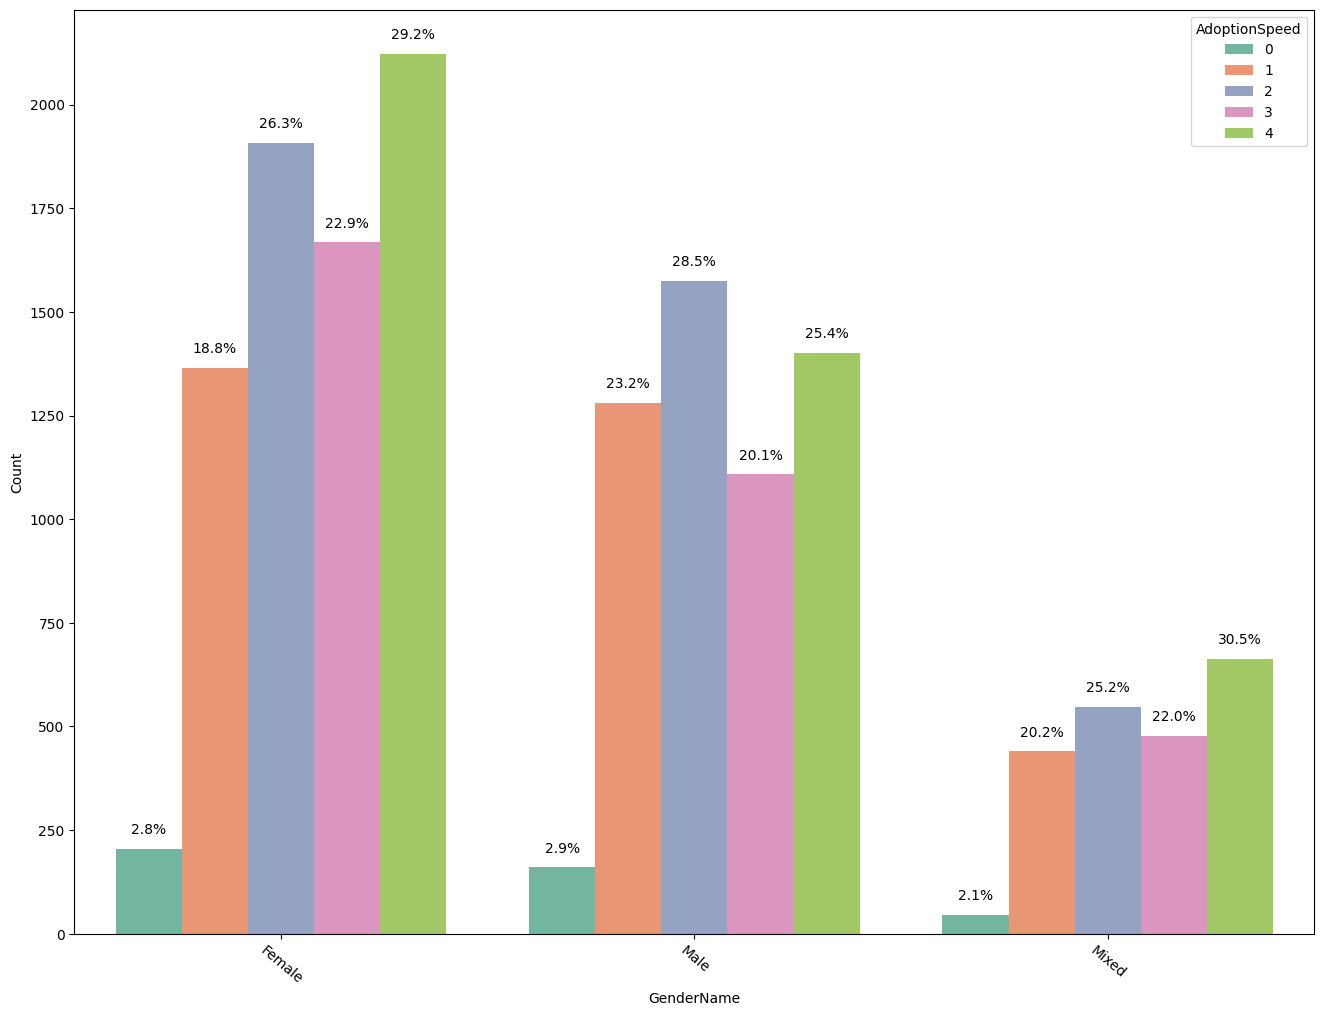

MaturitySizeName vs. AdoptionSpeed


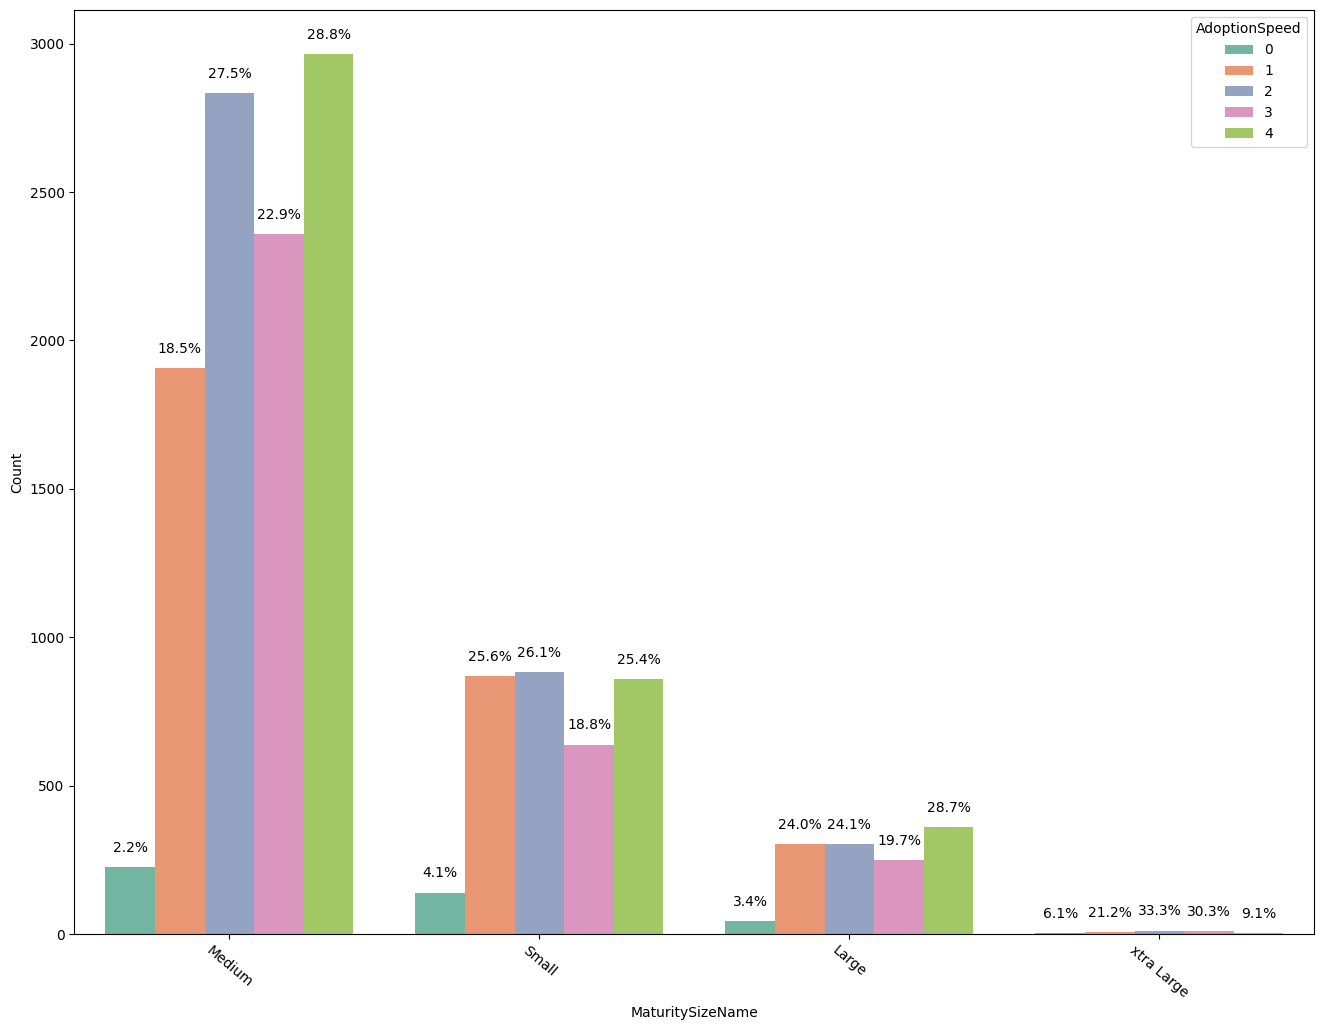

FurLengthName vs. AdoptionSpeed


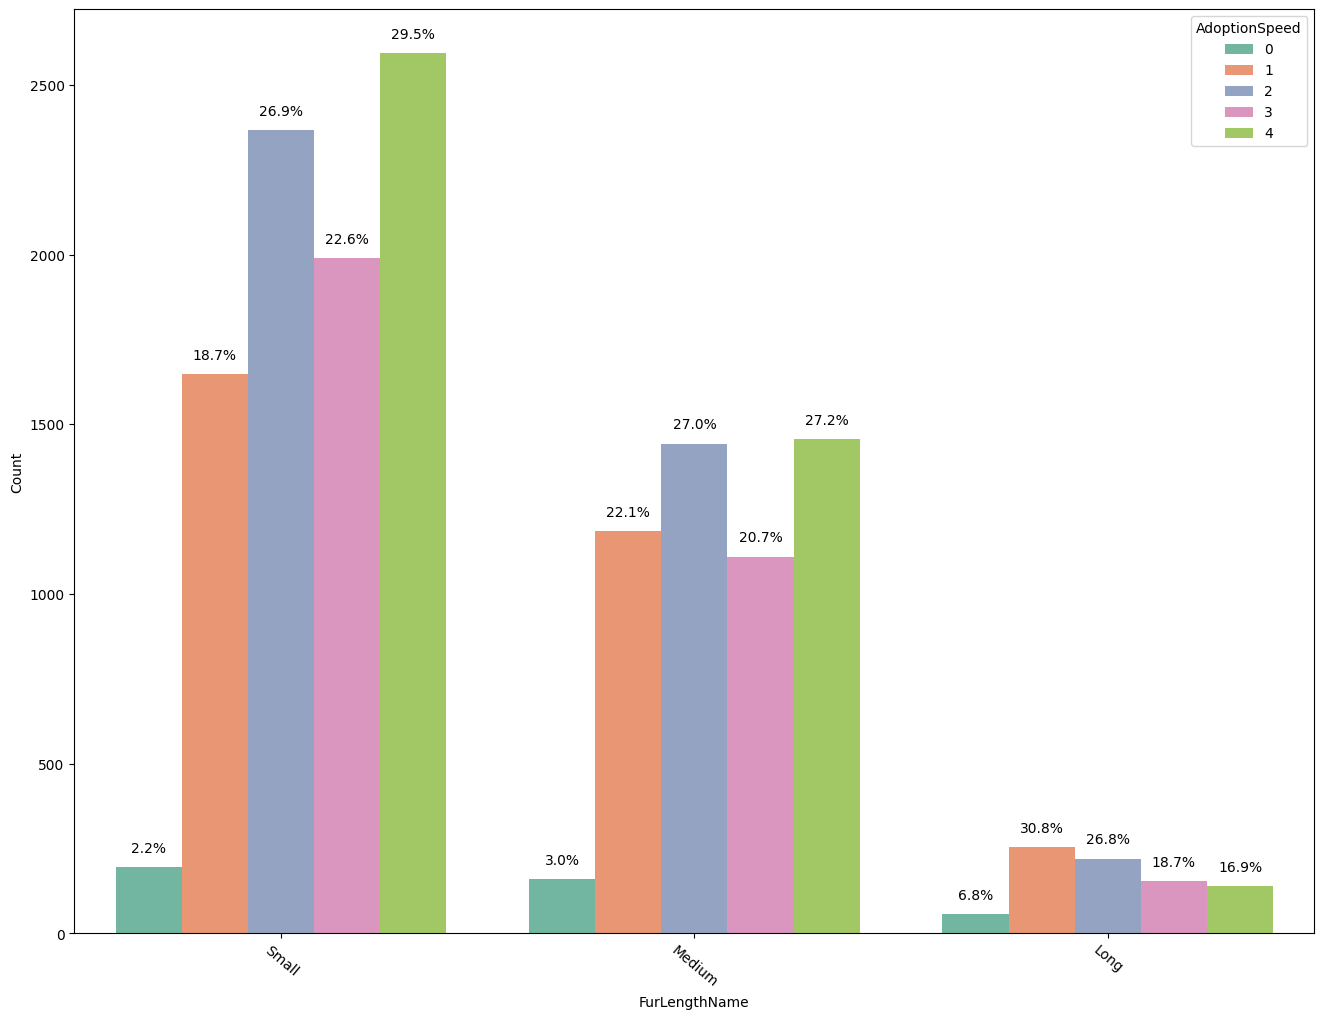

HealthName vs. AdoptionSpeed


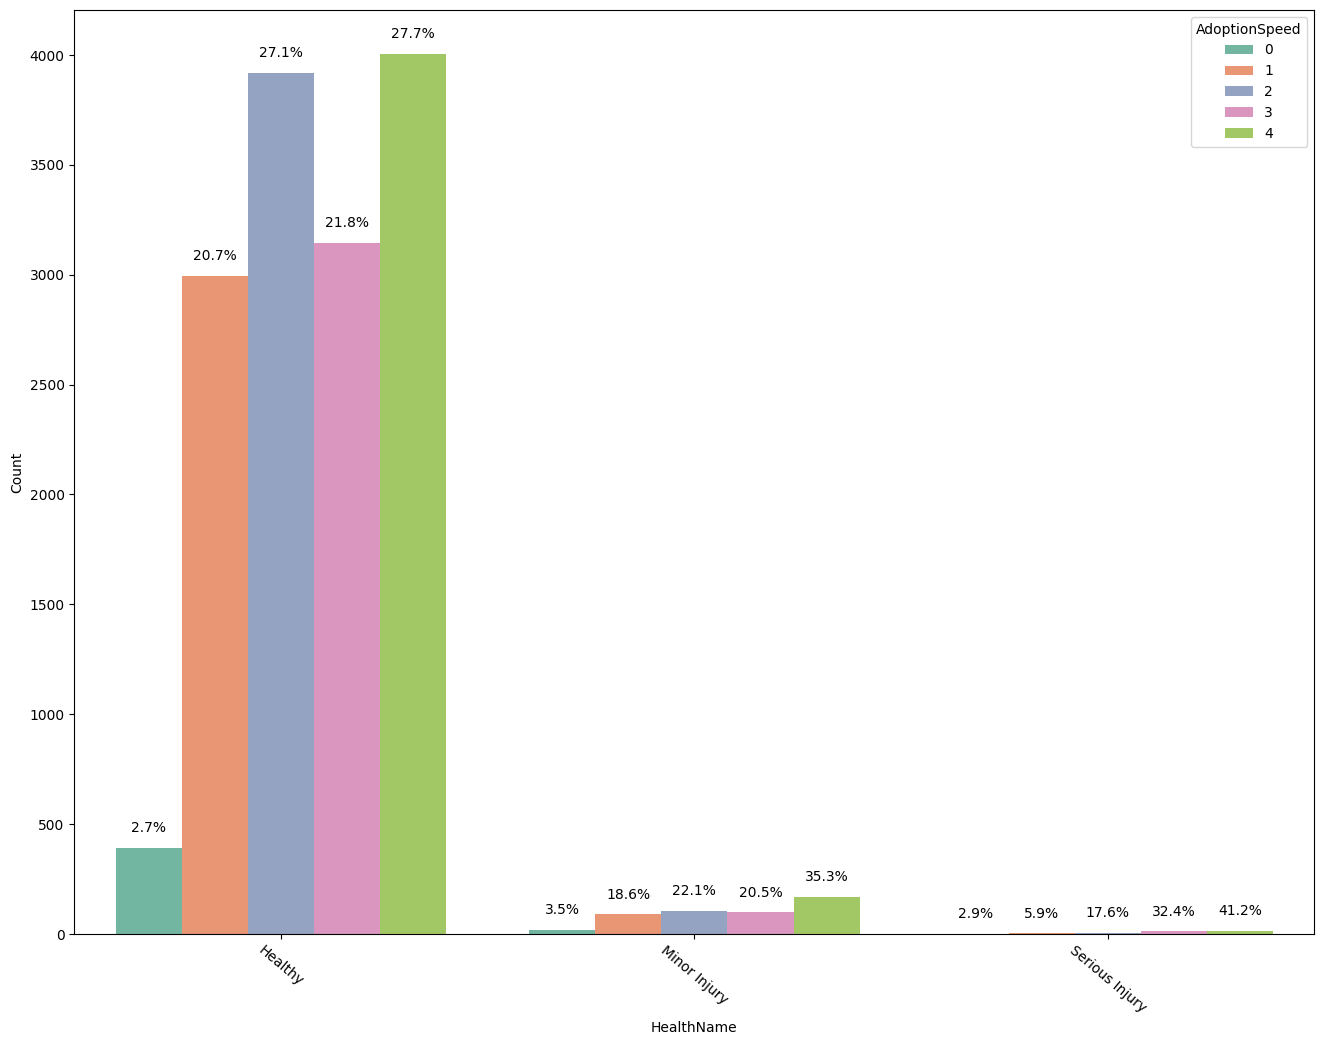

VaccinatedName vs. AdoptionSpeed


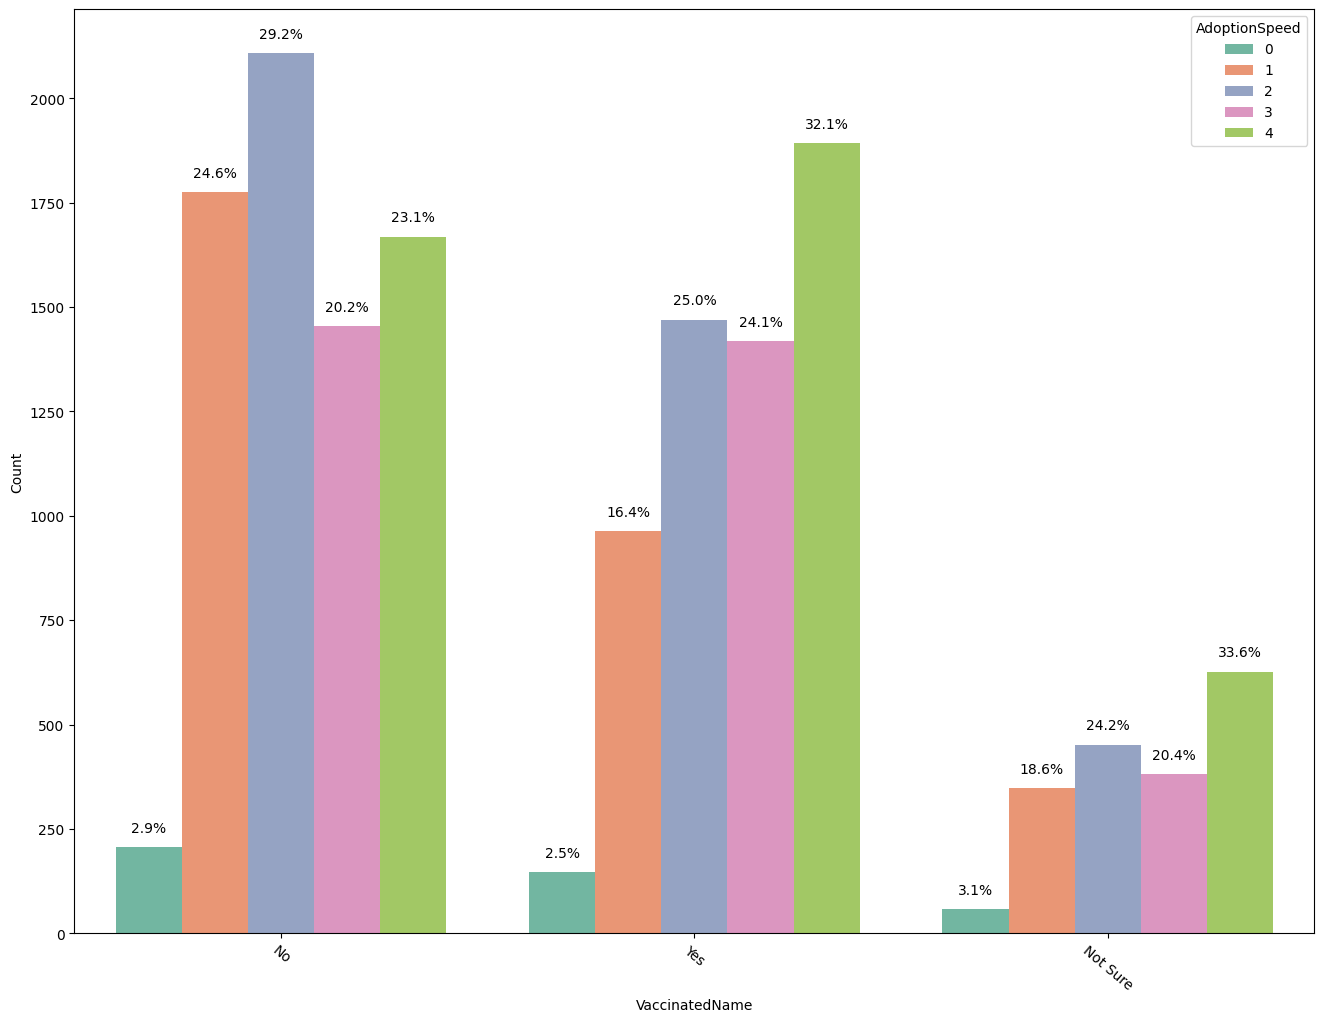

DewormedName vs. AdoptionSpeed


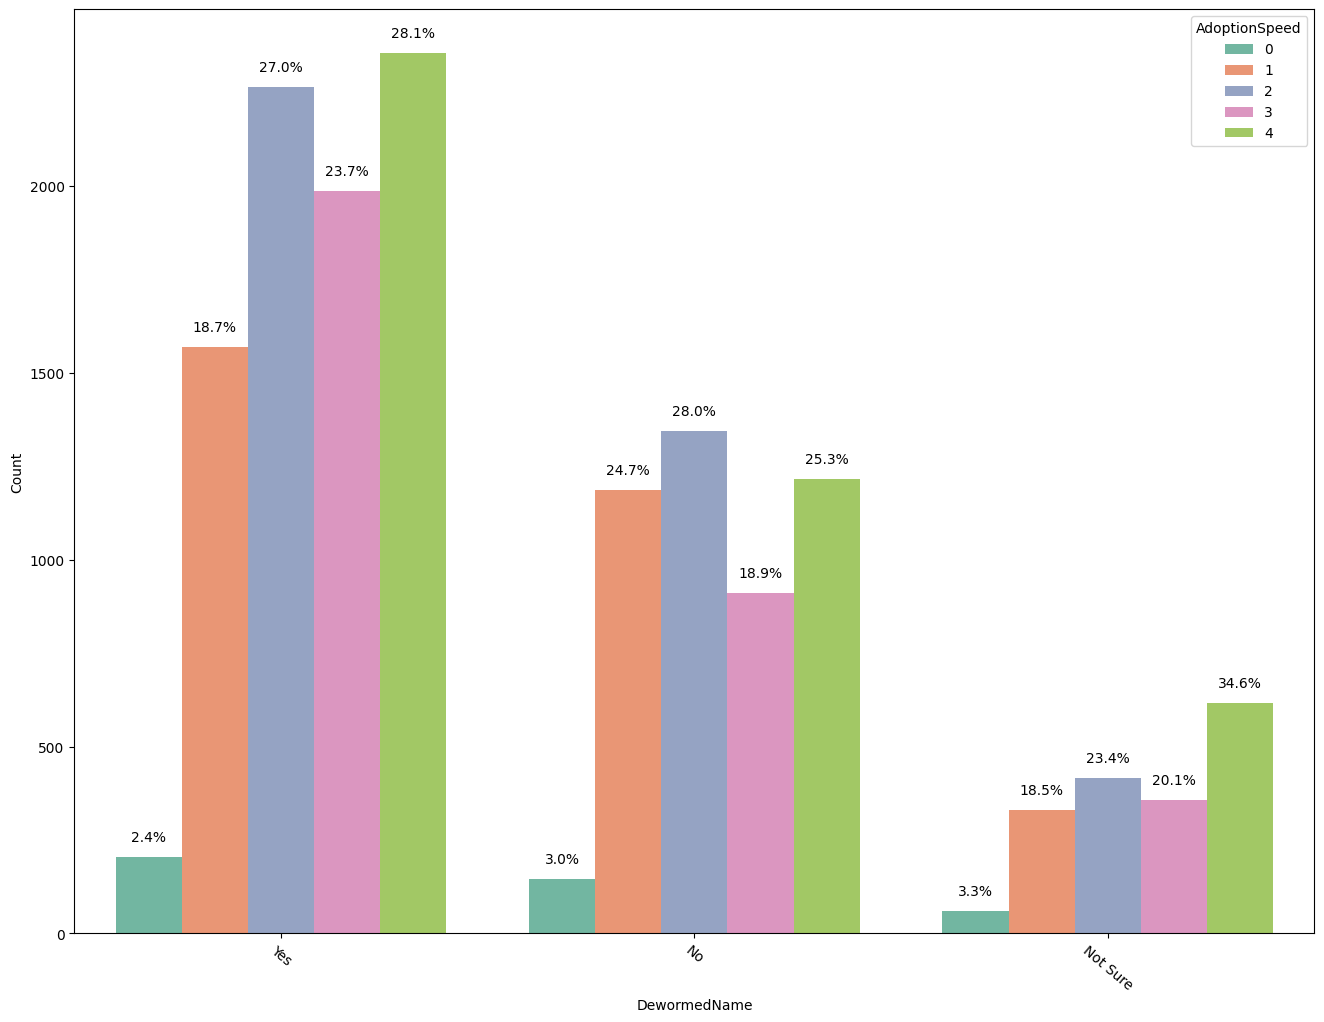

SterilizedName vs. AdoptionSpeed


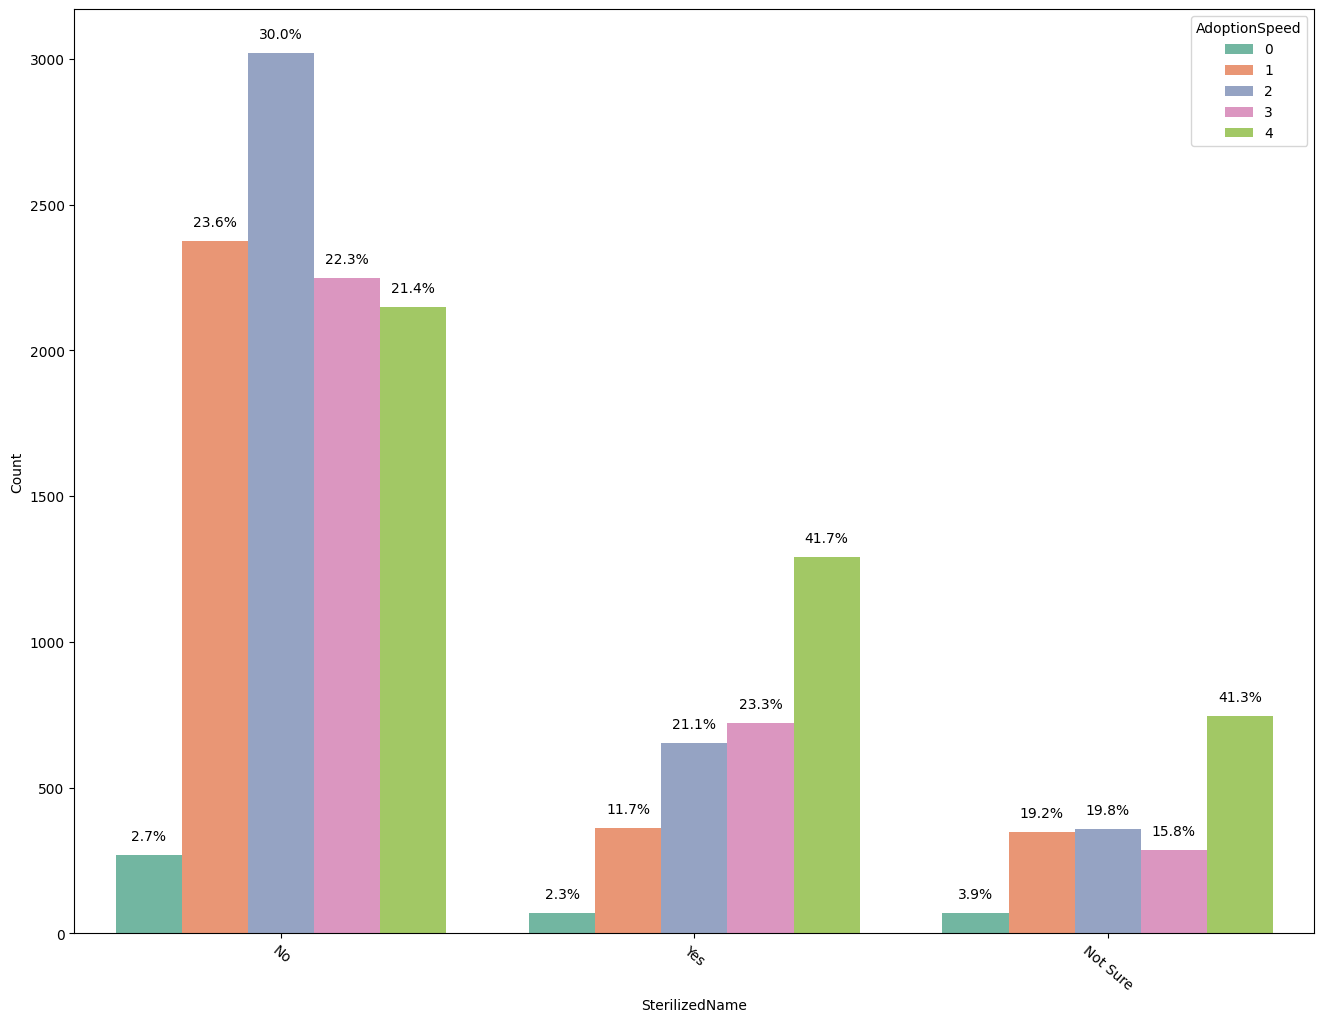

column BreedName has many unique values n = 175 and will not be plotted
column StateName has many unique values n = 14 and will not be plotted
ColorName vs. AdoptionSpeed


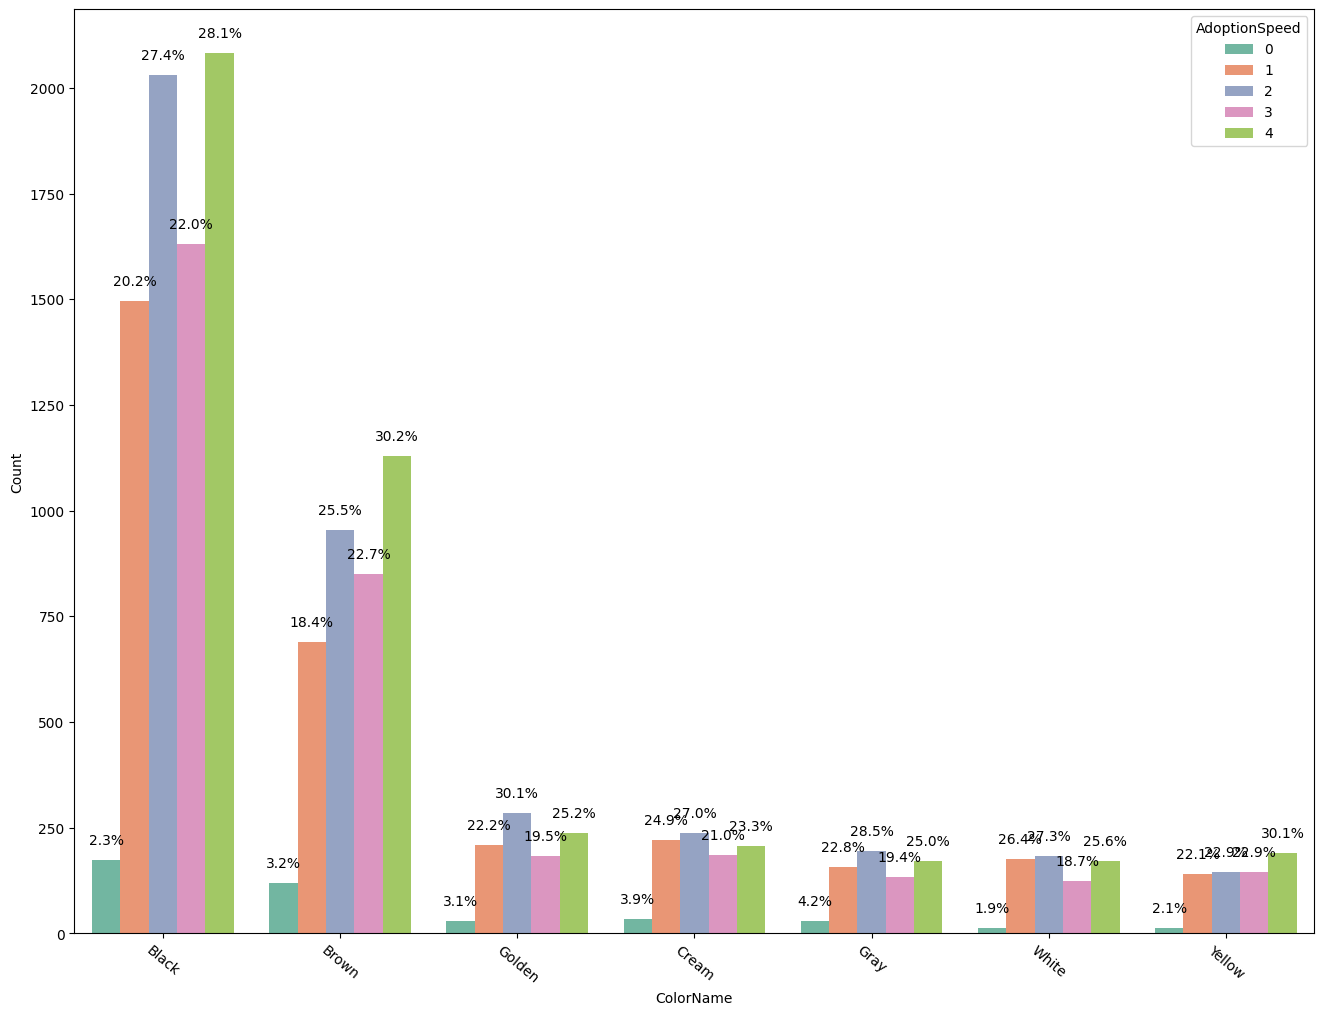

In [191]:
for categorical_feature in categorical_features:
    if df[categorical_feature].nunique() > 12:
        print(f'column {categorical_feature} has many unique values n = {df[categorical_feature].nunique()} and will not be plotted')
        print('=======================================================')
        continue
    else:
        eda_bivariate_categorical(data=df,column=categorical_feature,target=TARGET)

#### **Interpretation of Results**:

**AgeBins**: The speed of adoption seems to be higher with older animals since the number of animals that are adopted after 100 days increases to more than 40% from 6 to 60 months. However, elder animal (60-255 months), the adoption speed decreases.

**FeeBins**: The distribution of classes are not so different across classes no matter how much the fee is. 

**VideoAmtBins**: Looking into the percentage of animals that are adopted after 100 days (class 4), we noticed that when the post has at least one video, that percentage (class 4) drops.

**PhotoAmtBins**: Same as VideoAmtBins. The number of photo increases can affect the adoption speed positively. For those with no photos, upto 62.4% are not adopted after 100 days, while in other bins, that numbers are just at about 25% to 32%

**QuantityBins**: If the quantity of animals is high, the chance of early adoption is lower (the percentage of class 4 increases)

**BreedPure**: Althought the difference is not significant, from the diagram, we can see that the breedpure animals tend to be adopted earlier.

**NameorNO**: Same as breedpure, named animals tend to be adopted earlier.

**GenderName**: Males are more likely to be adopted sooner than female (see percentages in class 0, 1, 2)

**MaturitySizeName**: Smaller sizes are more preffered compared to others

**FurLengthName**: Longer fur animals are more preffered compare to shorter fur

**HealthName**: The difference can be clearly seen from the diagram. Healthy animal are adopted sooner than injured animals, and serious injured animals has quite high chance to be adopted after 100 days (41.2%)

**VaccinatedName**: Animals that are not vaccinated are adopted faster

**DewormedName**: Animals that are not dewormed are adopted faster

**SterilizedName**: Animals that are not sterilized are adopted faster

**ColorName**: Animals with colors golden, cream, gray and white are preffered than other with black, brown and yellow fur

### **Bivariate analysis for numerical features**

Age vs. AdoptionSpeed


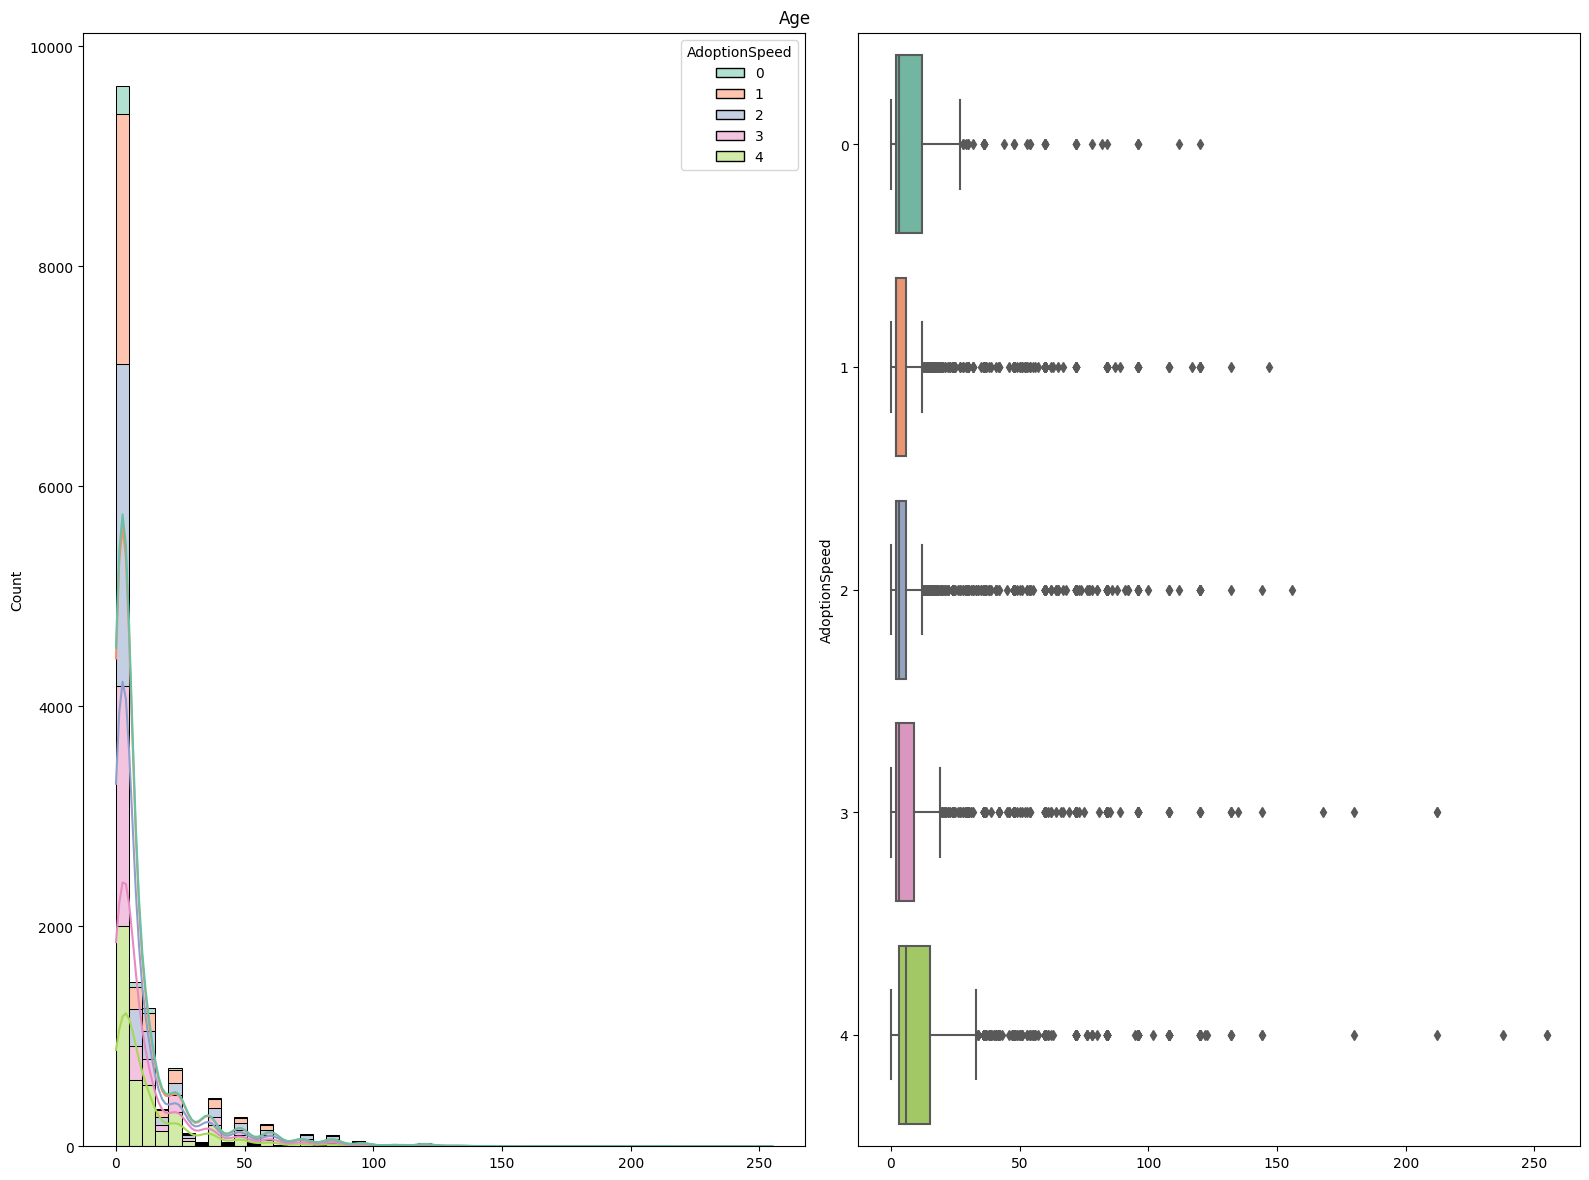

Quantity vs. AdoptionSpeed


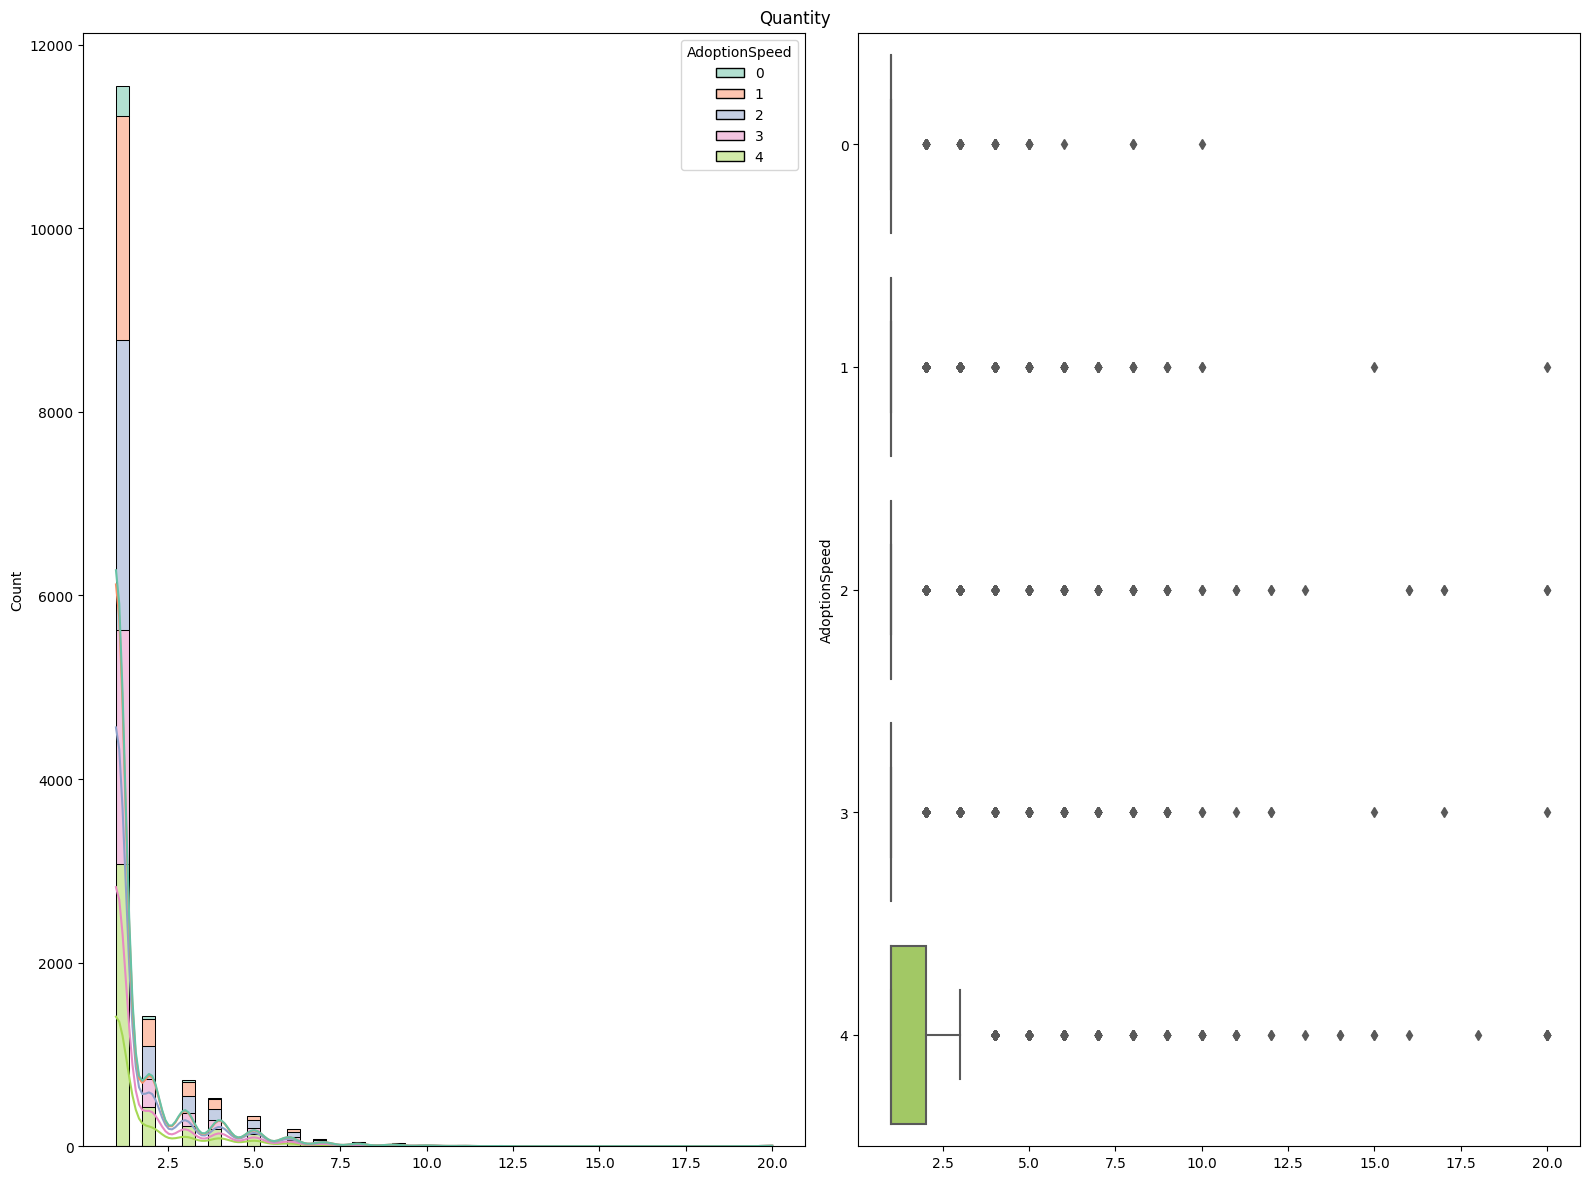

VideoAmt vs. AdoptionSpeed


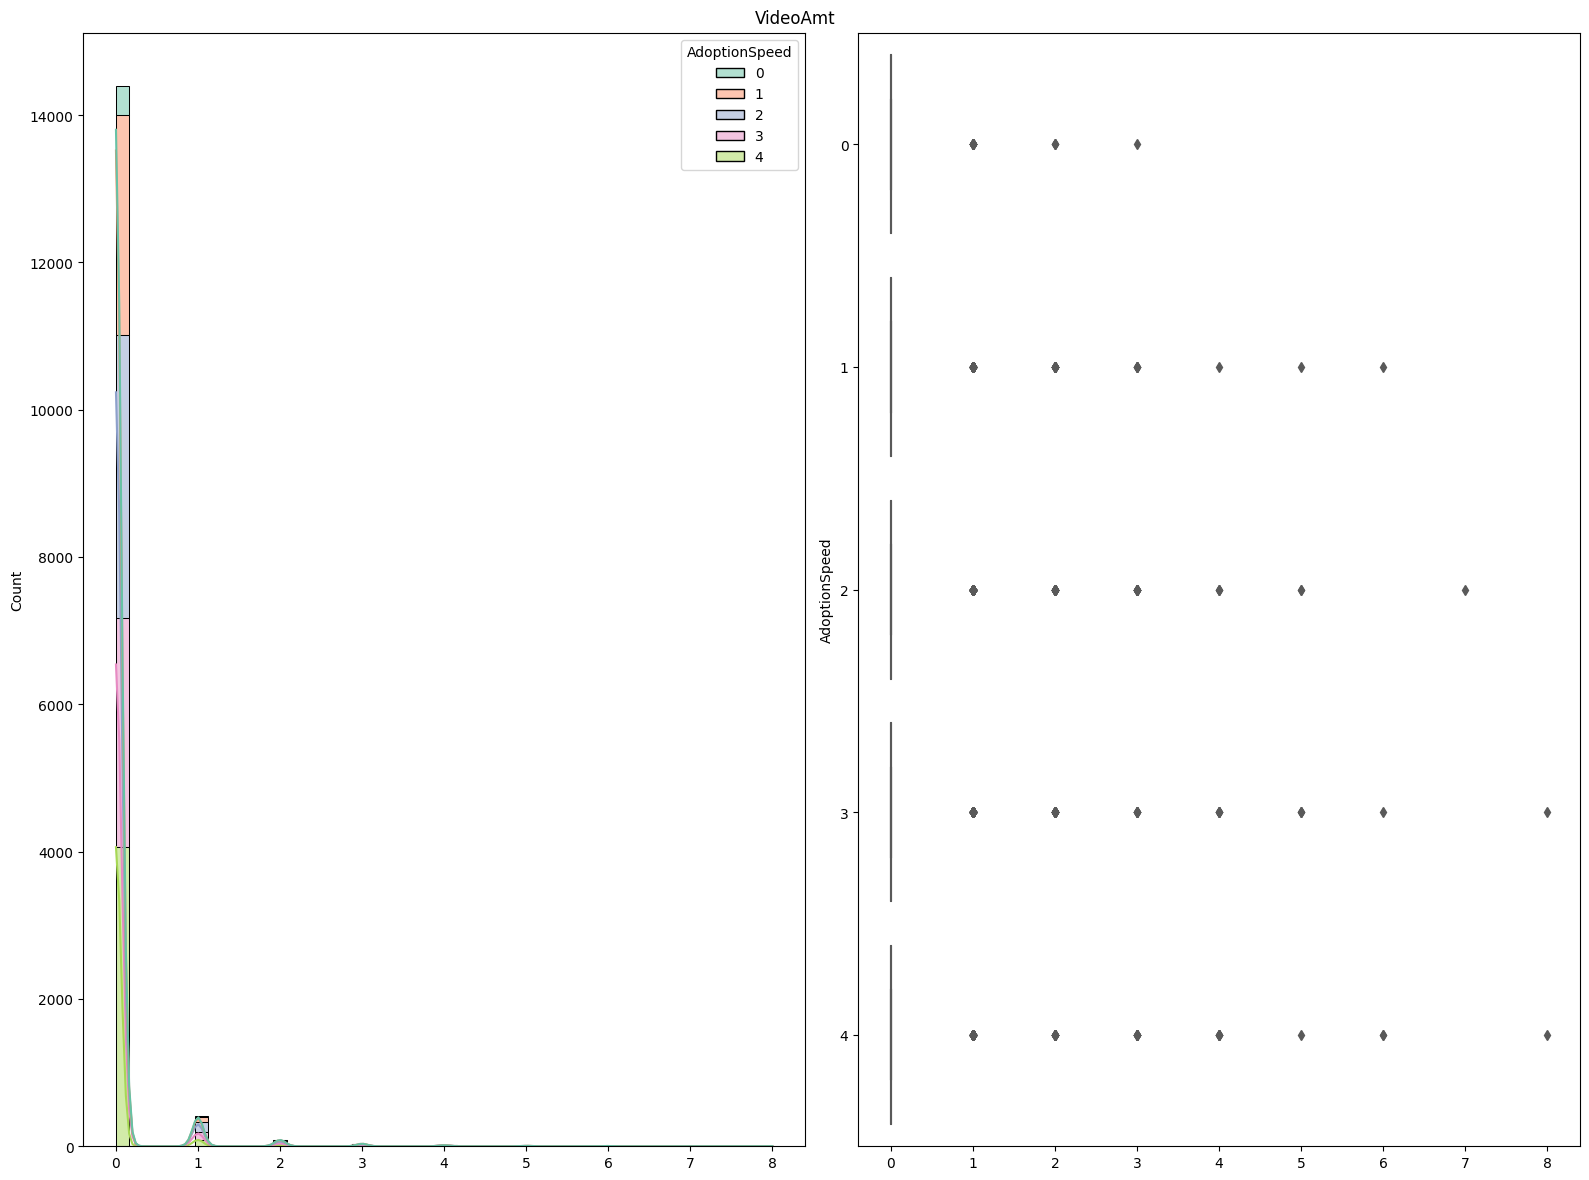

PhotoAmt vs. AdoptionSpeed


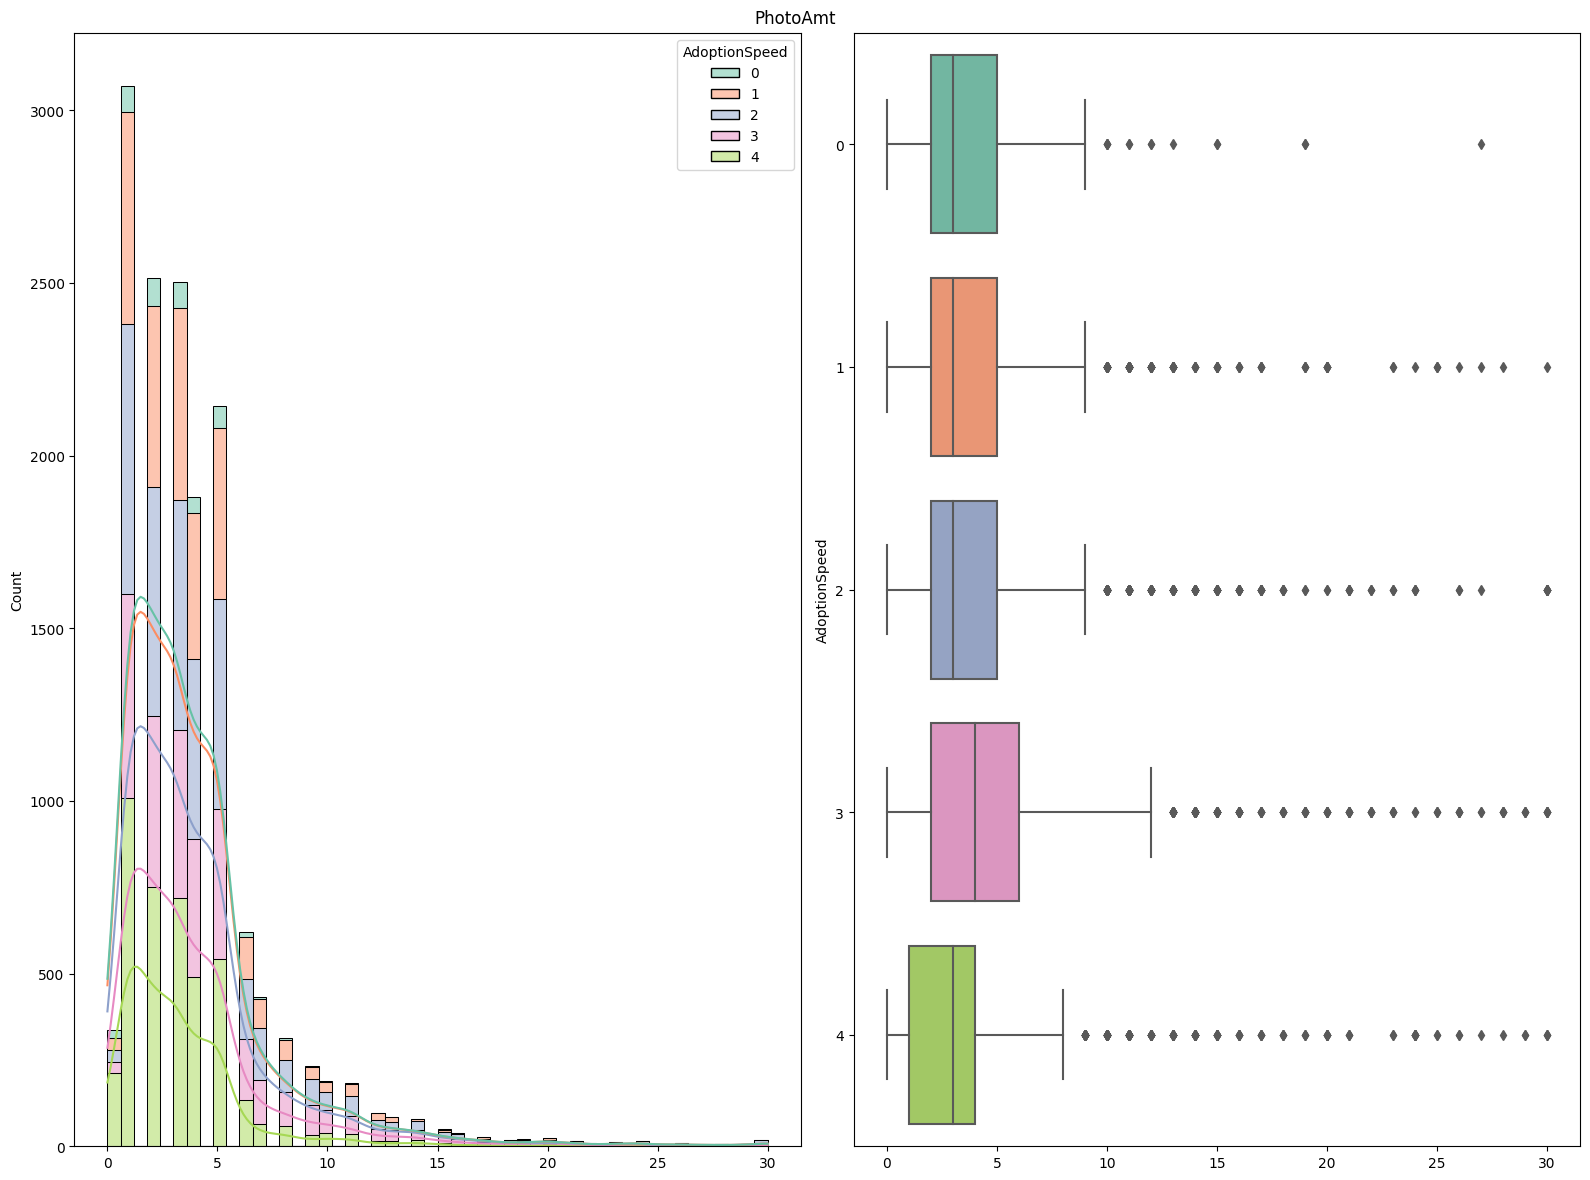

In [192]:
for numeric_feature in numerical_features:
    eda_bivariate_numerical(data=df, column=numeric_feature, target=TARGET)

#### **Interpretation of Results**:

**Age**: The age distribution follows a normal distribution and quite left skewed. The majority of animal are from 0 to 6 months. From the boxplot, we can see that older animals are likely to be adopted later (distribution of class 4).

**Quantity**: The majority of items have only one animal. The number of items that have more than 6 animals is insignificant. From the boxplot, we can see that higher quantity are likely to be adopted later (distribution of class 4)

**PhotoAmt**: If the post does not have any photo, the adopter/user tends not to adopt that animal (the number in class 4 is high > 50%). And that improves when the number of images increases  

**VideoAmt**: It is quite hard to derive any useful information from this diagram, since the number of videos is highly skewed with most of the posts have no videos.
 

### **Text/Description Analysis**

In [193]:
def lang_detect(text: str):
    """Detect the language of the text

    Args:
        text (str): text to detect

    Returns:
        str: language of the text
    """
    try:
        if detect(text) == 'en':
            return text
        else:
            return ""
    except:
        return ""

df['Description'] = df['Description'].apply(lang_detect)

In [194]:
categories = df[TARGET].unique()
names = df['Name'].unique()
names = [name.lower() for name in names if type(name) == str]
stop_words = set(stopwords.words('english'))
stop_words = stop_words.union(names)

In [195]:
tfidf = TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 2), stop_words=list(stop_words),  token_pattern=r'[a-zA-Z]+')
features = tfidf.fit_transform(df['Description']).toarray()

In [196]:
map_class = {
    0: 'Same Day',
    1: '1-7 Days',
    2: '8-30 Days',
    3: '31-90 Days',
    4: 'No Adoption'
}
for category in sorted(categories):
    features_chi2 = chi2(features, df[TARGET] == category)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names_out())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print(f"===> '{map_class[category]}'")
    print(f"  . Most correlated unigrams:\n       . {', '.join(unigrams[-5:])}")
    print(f"  . Most correlated bigrams:\n       . {', '.join(bigrams[-5:])}")
    gc.collect()

===> 'Same Day'
  . Most correlated unigrams:
       . ranji, redemption, entitles, entitled, facilitate
  . Most correlated bigrams:
       . half litter, august actually, actually half, pick collection, time pick
===> '1-7 Days'
  . Most correlated unigrams:
       . precaution, ooi, felicia, jin, adoption
  . Most correlated bigrams:
       . food toilet, looking breed, adopt pls, contact jin, pls contact
===> '8-30 Days'
  . Most correlated unigrams:
       . patients, purposes, kembangan, precautionary, allowable
  . Most correlated bigrams:
       . abandoned farm, us via, adopt contact, mongrel adoption, lil currently
===> '31-90 Days'
  . Most correlated unigrams:
       . spay, u, pls, commitment, compulsory
  . Most correlated bigrams:
       . commitment spay, spay compulsory, u interested, pls contact, adopt pls
===> 'No Adoption'
  . Most correlated unigrams:
       . stewie, spay, commitment, compulsory, adoption
  . Most correlated bigrams:
       . us anyone, please fee

#### **Interpretation of Results**:

We can clearly see that although I removed stop_words and common names, there are a lot of other common words and acronyms, that are not contribute to the context of the problem (pls contact, adoption, ... for example). There are quite a lot of noises in this text description.

#### **Decision made**:

- Handle text data more carefully by finding out other common words and acronyms, that are not contribute to the context of the problem and removing them.
- Use truncated SVD or other dimensionality reduction methods to reduce the feature space from Tf-idf

### **Data preparation, Input selection and Feature engineering decisions**

1. **Data preparation and feature engineering**:
For data preprocessing, I decided to limit the number, since the number of entries after that limit are insignificant.
- **Quantity**: Replace all values greater than 6 with 6

- **PhotoAmt**: Replace all values greater than 10 with 10

- **VideoAmt**: Replace all values greater than 2 with 2   

- **BreedName**: I only keep the top 12 most common breed names (6 for dogs and 6 for cats), then combine other classes into 'Other' to reduce the cardinality

- Use OrdinalEncoding for categorical data instead of OneHotEncoding to reduce feature space and training time (see Model Selection)

- Handle text data more carefully by finding out other common words and acronyms, that are not contribute to the context of the problem and removing them.

- Use truncated SVD or other dimensionality reduction methods to reduce the feature space from Tf-idf

2. **Model/algorithm selection**:
- I treated this problem as a regression problem, instead of a normal classification problem to capture the order of classes. I will do threshold finetune later for better prediction. 

- Since the number of categorical data are quite huge and the number of categories is also big, if I use one hot encoding, the feature space will be enormous and the data is quire spare. Many models will face with the curse of dimensionality, therefore, I decide to go with models that do not require one hot encode and has native support for categorical data. **LightGBM** for example 

3. **Input selection**

- The original data set have some duplicates columns for example (`Type`, and `TypeName`). For model training, I only use `Type` (with encoded name as number) for easier data preprocess. And for Exploratory Data Analysis, I use `TypeName` for better visualisation.

- I decide to use tree-based algorithms, which can natively help me to find the good feature to split to maximize information gain, so for this project, I do not do any input selection and let the algorithms decide. This method might introduce more noise to the data and might cause overfitting. I will do input selection carefully if I have more time for this project.